In [4]:
import pandas as pd

btwd_raw_data = pd.read_csv("../data/tr/bilkent-turkish-writings/bilkent-turkish-writings-dataset.csv")

In [5]:
len(btwd_raw_data)

,Unnamed: 0,text
0,0,BATUHAN ERDURCAN \r\n21301855 \r\nTURK 101-13 ...
1,1,\r\nYalçın Arslan \r\n21300458 \r\nAslı Uçar ...
2,2,Sudenur SOYSAL \r\nGÜZELLİK Mİ ÇİRKİNLİK Mİ HA...
3,3,Mars’ta Yaşam mı? \r\n \r\nHayatım boyunca evr...
4,4,"Bir Şehrin İki Yakasında \r\n \r\n""İki büyük c..."


In [18]:
from utils import read_json

# btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post.json")
btwd_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1.json")

In [19]:
len(btwd_data["data"])

1048

In [18]:
from utils import read_json

fi_data = read_json("../experiments/data/fi/v4/default/finnish_v4_default_final_morph.json")

In [19]:
unique_roots = set()

for sample in fi_data["data"]:
    unique_roots.add(sample["root"])

len(unique_roots)

406

In [20]:
unique_roots = set()

for sample in btwd_data["data"]:
    unique_roots.add(sample["root"])

len(unique_roots)

477

In [22]:
unique_meta_morphemes = set()

for sample in btwd_data["data"]:
    unique_meta_morphemes.update(set(sample["meta_suffixes"]))

len(unique_meta_morphemes)

96

In [9]:
from collections import defaultdict
unique_meta_morphemes_by_suffix_len = defaultdict(set)

for sample in btwd_data["data"]:
    unique_meta_morphemes_by_suffix_len[len(sample["meta_morphemes"])].update(set(sample["meta_morphemes"]))

[(k, len(v)) for k, v in unique_meta_morphemes_by_suffix_len.items()]

[(2, 98),
 (0, 0),
 (1, 89),
 (3, 96),
 (4, 92),
 (6, 74),
 (5, 81),
 (7, 57),
 (8, 45),
 (9, 23)]

In [21]:
unique_morphemes = set()

for sample in fi_data["data"]:
    unique_morphemes.update(set(sample["prefixes"]+sample["suffixes"]))

len(unique_morphemes)

386

In [23]:
unique_morphemes = set()

for sample in btwd_data["data"]:
    unique_morphemes.update(set(sample["suffixes"]))

len(unique_morphemes)

243

In [11]:
from collections import defaultdict
unique_morphemes_by_suffix_len = defaultdict(set)

for sample in btwd_data["data"]:
    unique_morphemes_by_suffix_len[len(sample["morphemes"])].update(set(sample["morphemes"]))

[(k, len(v)) for k, v in unique_morphemes_by_suffix_len.items()]

[(2, 348),
 (0, 0),
 (1, 304),
 (3, 329),
 (4, 304),
 (6, 200),
 (5, 254),
 (7, 135),
 (8, 78),
 (9, 30)]

In [24]:
unique_meta_morpheme_combs = set()

for sample in btwd_data["data"]:
    unique_meta_morpheme_combs.add(tuple(sample["meta_suffixes"]))

len(unique_meta_morpheme_combs)

931

In [22]:
unique_morphemes_combs = set()

for sample in fi_data["data"]:
    unique_morphemes_combs.add(tuple(sample["prefixes"] + sample["suffixes"]))

len(unique_morphemes_combs)

365

In [4]:
from collections import defaultdict

unique_morpheme_freq_by_len = defaultdict(int)

for sample in btwd_data["data"]:
    unique_morpheme_freq_by_len[len(sample["morphemes"])] += 1

In [5]:
unique_morpheme_freq_by_len

defaultdict(int,
            {2: 65568,
             0: 10895,
             1: 34775,
             3: 63811,
             4: 34308,
             6: 2980,
             5: 12533,
             7: 433,
             8: 50,
             9: 7})

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

sns.set_theme(style="whitegrid")

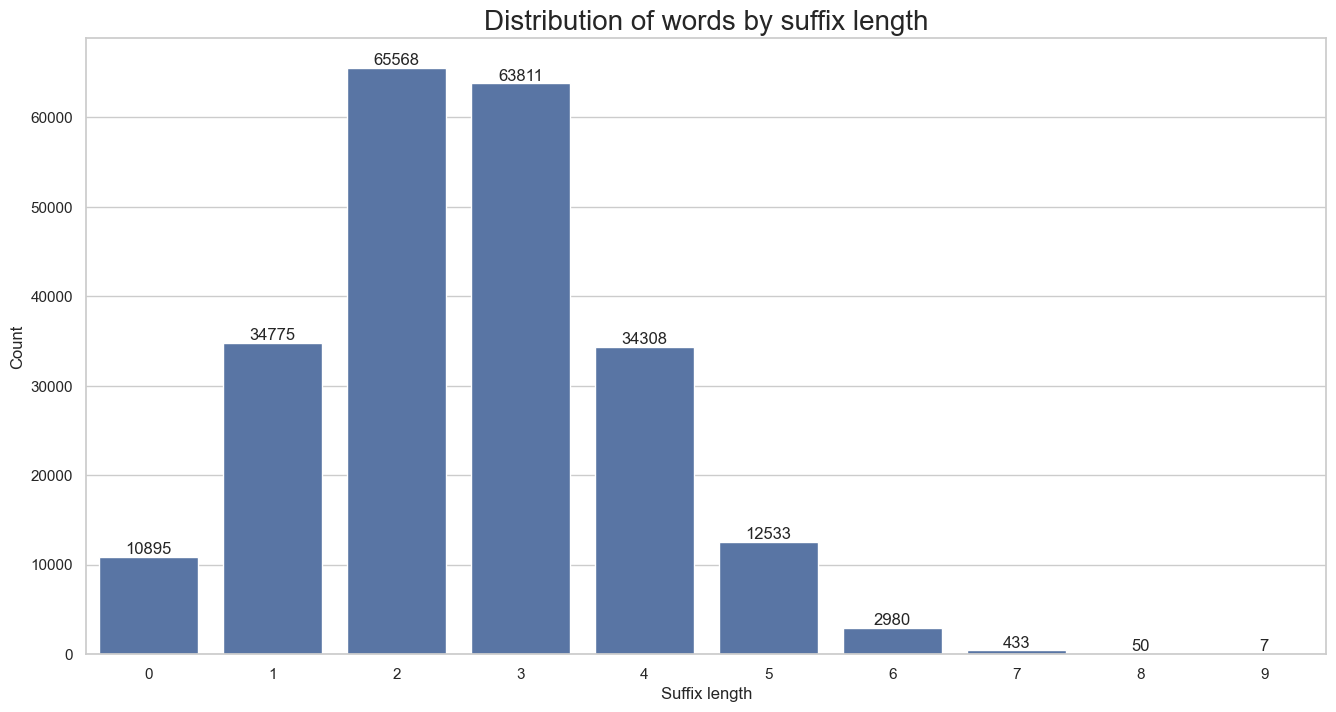

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of words by suffix length")
ax.set_xlabel("Suffix length")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(unique_morpheme_freq_by_len, ax=ax)
for i in ax.containers:
    ax.bar_label(i,)

<Axes: title={'center': 'Distribution of meta suffixes (top 20)'}, xlabel='Meta suffix', ylabel='Count'>

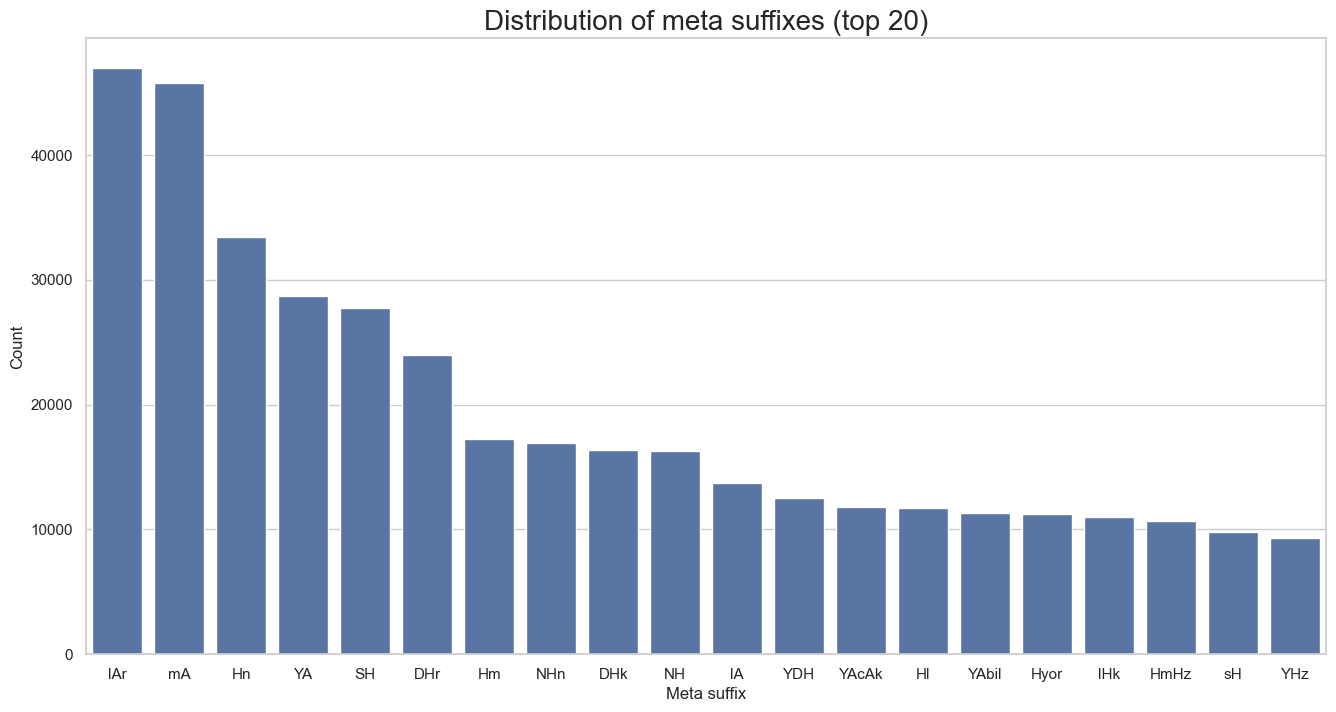

In [28]:
meta_morphemes = []

for sample in btwd_data["data"]:
    meta_morphemes.extend(sample["meta_morphemes"])

meta_morpheme_counter = Counter(meta_morphemes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of meta suffixes (top 20)")
ax.set_xlabel("Meta suffix")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(meta_morpheme_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of suffixes (top 20)'}, xlabel='Suffix', ylabel='Count'>

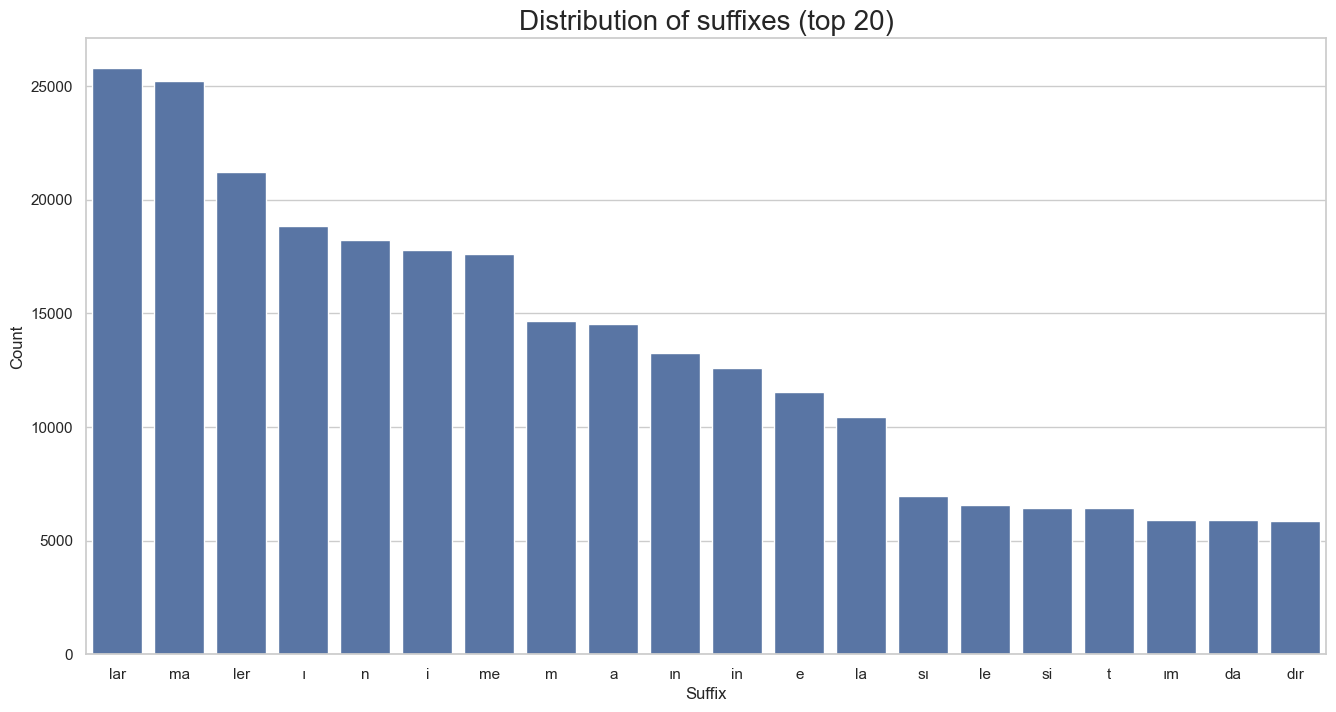

In [29]:
morphemes = []

for sample in btwd_data["data"]:
    morphemes.extend(sample["morphemes"])

morpheme_counter = Counter(morphemes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffixes (top 20)")
ax.set_xlabel("Suffix")
ax.set_ylabel("Count")
ax.title.set_size(20)
sns.barplot(dict(morpheme_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of meta suffix combinations (top 20)'}, xlabel='Meta suffix combination', ylabel='Count'>

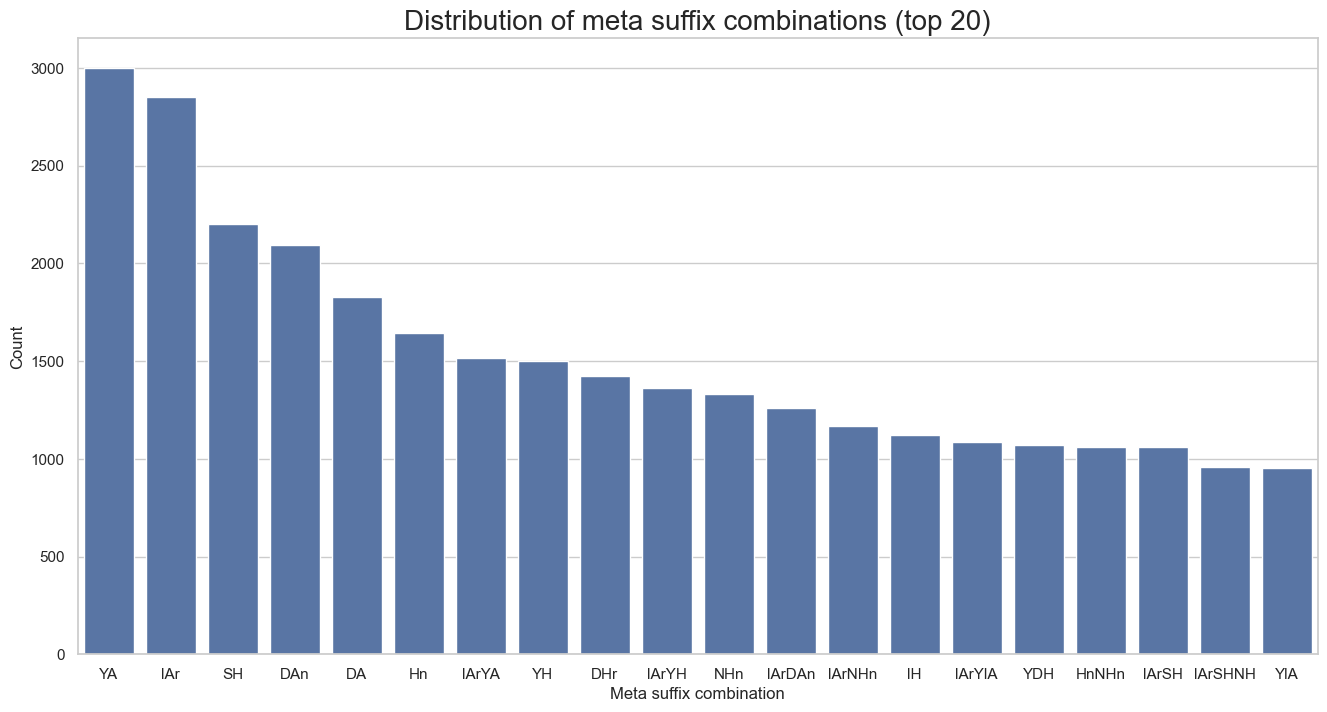

In [33]:
meta_morpheme_combs = []

for sample in btwd_data["data"]:
    meta_morpheme_combs.append("".join(sample["meta_morphemes"]))

meta_morpheme_combs_counter = Counter(meta_morpheme_combs)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of meta suffix combinations (top 20)")
ax.set_xlabel("Meta suffix combination")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(meta_morpheme_combs_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of suffix combinations (top 20)'}, xlabel='Suffix combination', ylabel='Count'>

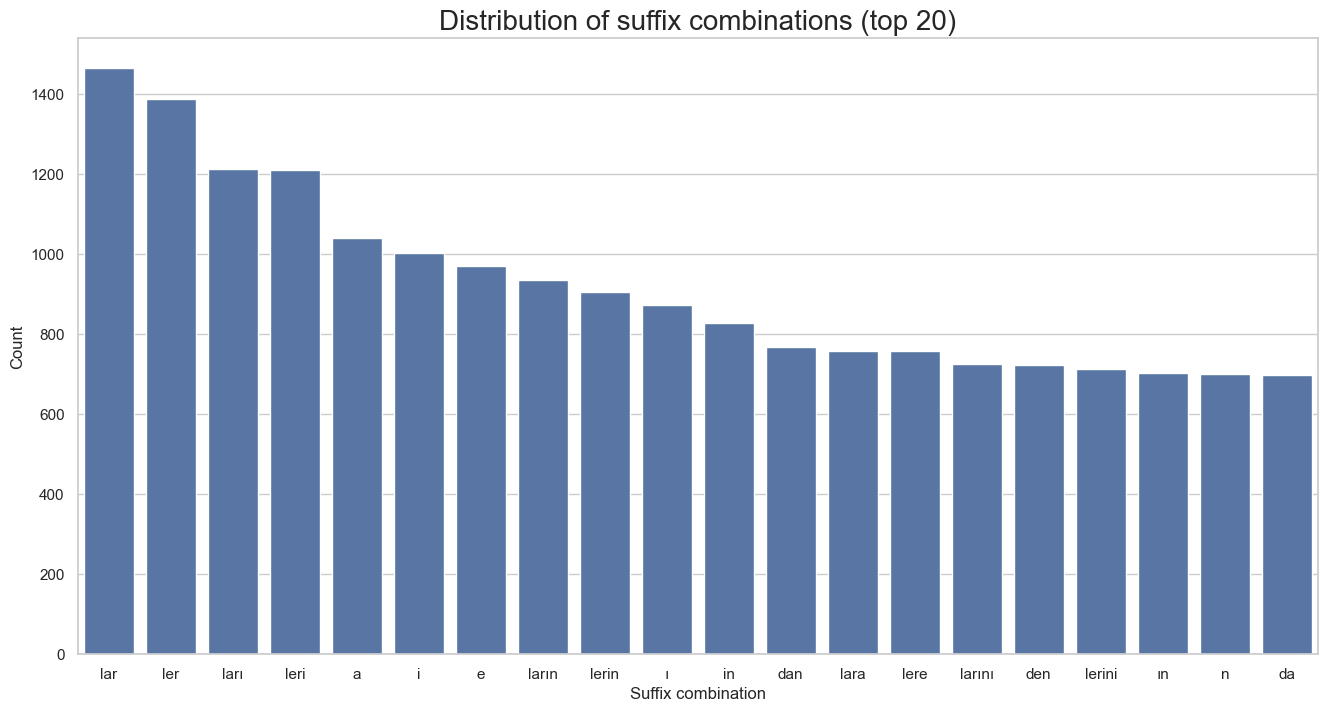

In [34]:
morpheme_combs = []

for sample in btwd_data["data"]:
    morpheme_combs.append("".join(sample["morphemes"]))

morpheme_combs_counter = Counter(morpheme_combs)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffix combinations (top 20)")
ax.set_xlabel("Suffix combination")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(morpheme_combs_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

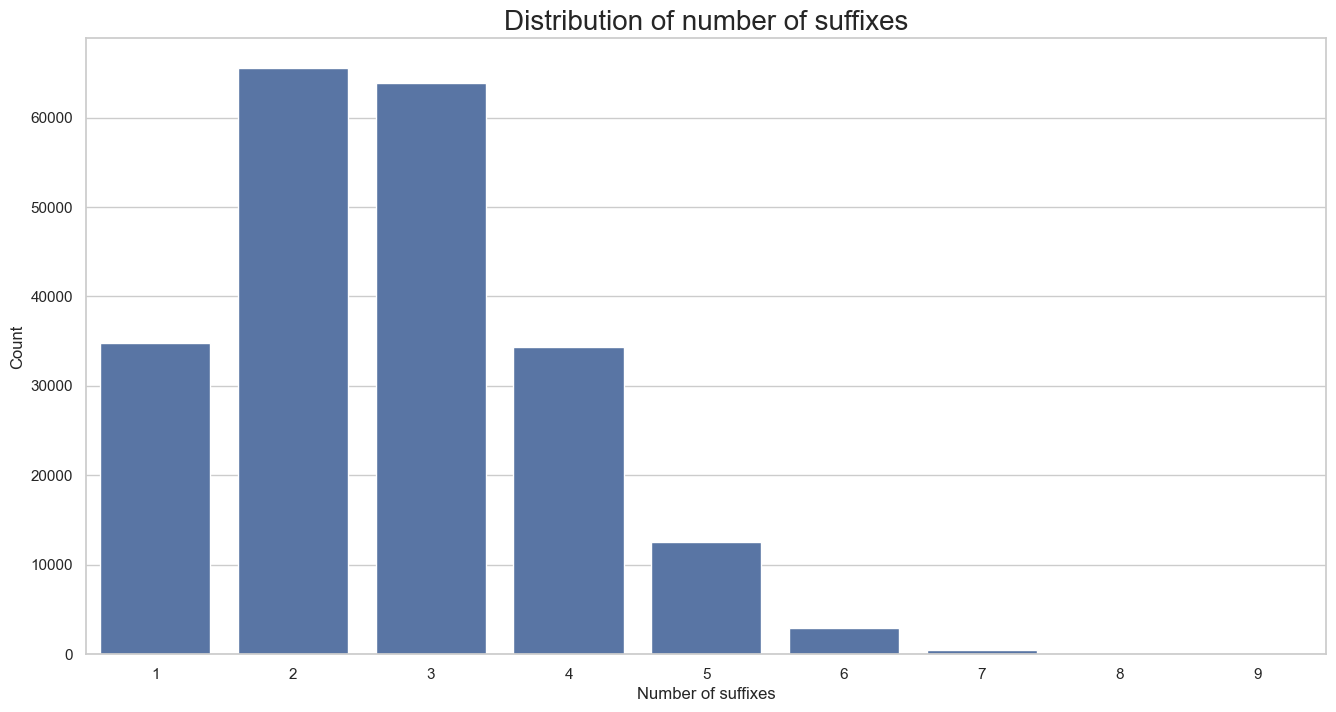

In [35]:
number_of_suffixes = []

for sample in btwd_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [36]:
number_of_suffixes_counter

Counter({2: 65580,
         3: 63813,
         1: 34819,
         4: 34309,
         5: 12533,
         6: 2980,
         7: 433,
         8: 50,
         9: 7})

In [7]:
from utils import read_json
balanced_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced.json")

Counter({1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 282})


<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

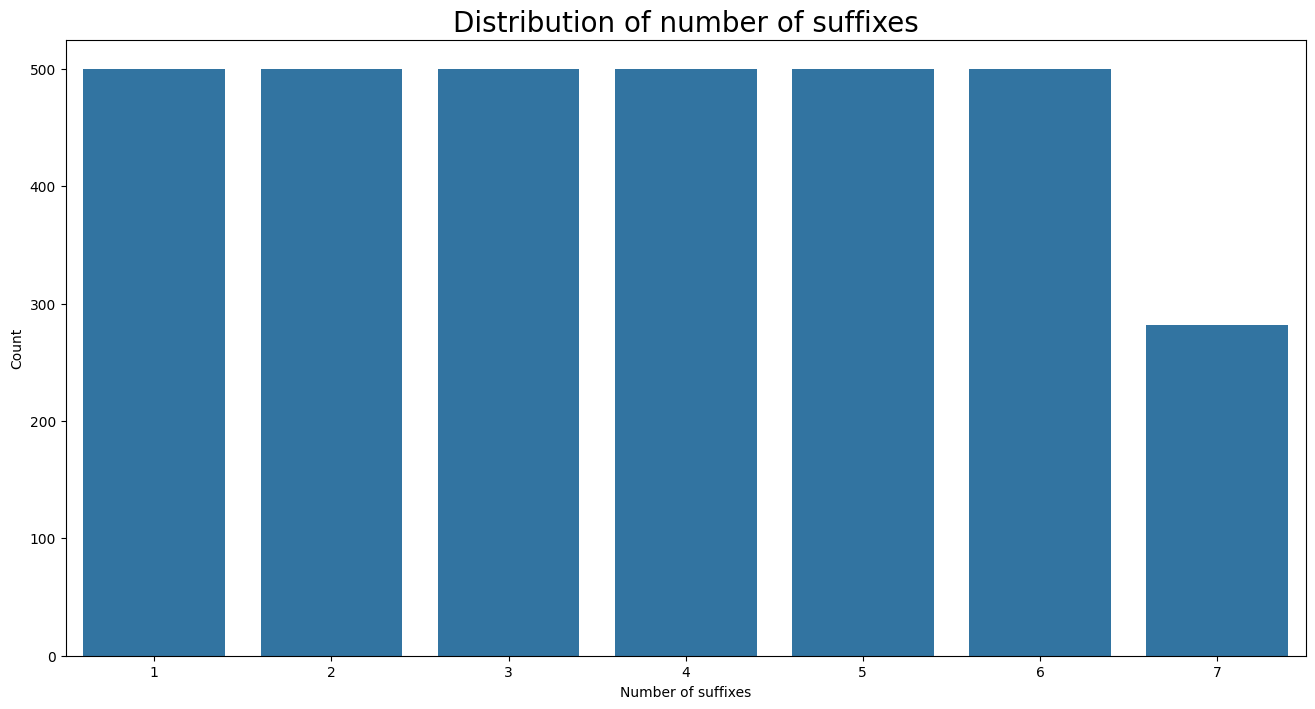

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

number_of_suffixes = []

for sample in balanced_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
print(number_of_suffixes_counter)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [30]:
from utils import read_json

en_data = read_json("../data/en/MorphoLEX_en_prep.json")

In [31]:
len(en_data["data"])

6319

In [32]:
unique_roots = set()

for sample in en_data["data"]:
    unique_roots.add(sample["root"])

len(unique_roots)

3028

In [33]:
unique_morphemes = set()

for sample in en_data["data"]:
    unique_morphemes.update(set(sample["morphemes"]))

len(unique_morphemes)

395

In [34]:
unique_morphemes_combs = set()

for sample in en_data["data"]:
    unique_morphemes_combs.add(tuple(sample["morphemes"]))

len(unique_morphemes_combs)

604

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

sns.set_theme(style="whitegrid")

<Axes: title={'center': 'Distribution of suffixes (top 20)'}, xlabel='Suffix', ylabel='Count'>

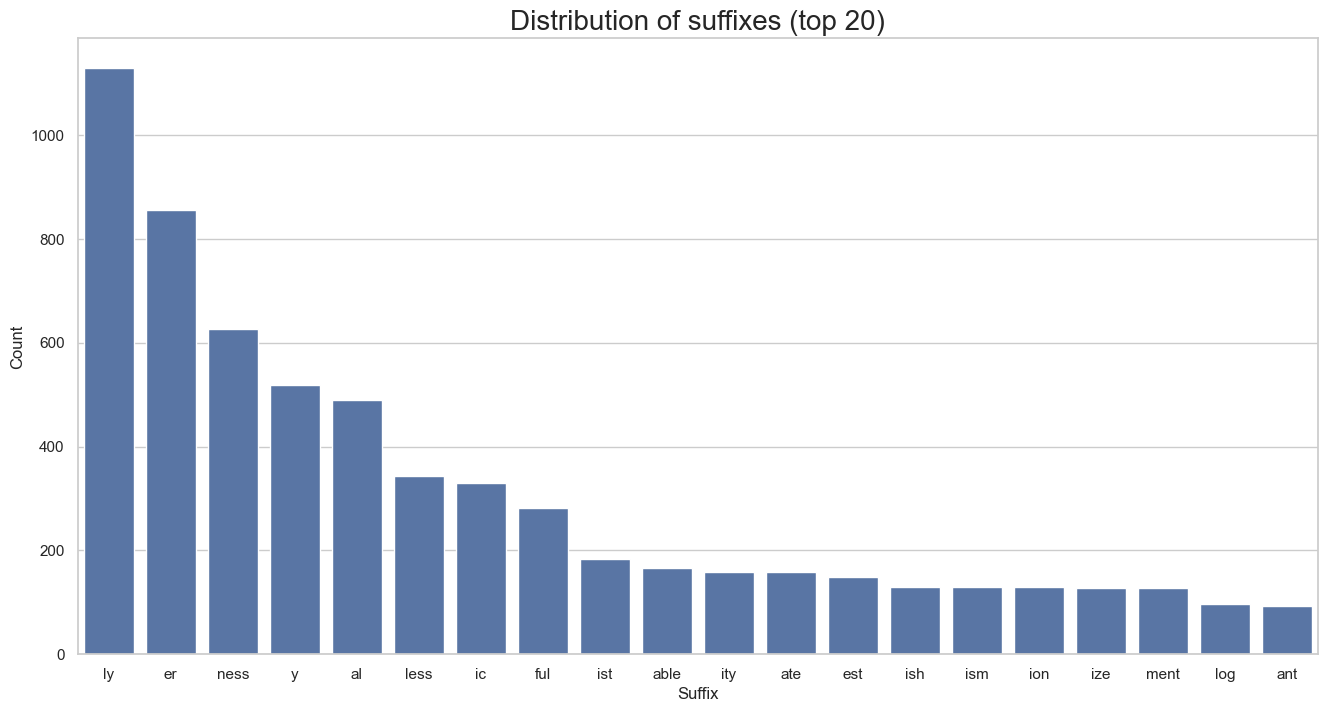

In [36]:
morphemes = []

for sample in en_data["data"]:
    morphemes.extend(sample["morphemes"])

morpheme_counter = Counter(morphemes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffixes (top 20)")
ax.set_xlabel("Suffix")
ax.set_ylabel("Count")
ax.title.set_size(20)
sns.barplot(dict(morpheme_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of suffix combinations (top 20)'}, xlabel='Suffix combination', ylabel='Count'>

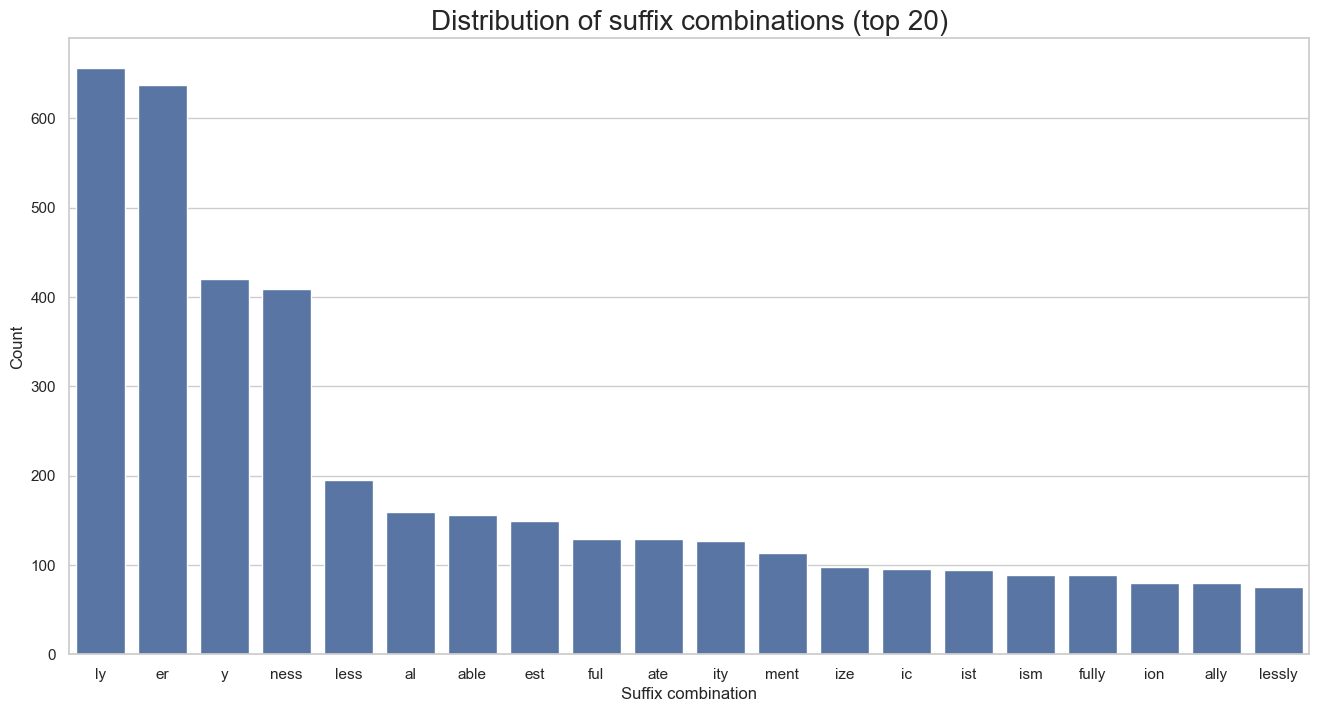

In [37]:
morpheme_combs = []

for sample in en_data["data"]:
    morpheme_combs.append("".join(sample["morphemes"]))

morpheme_combs_counter = Counter(morpheme_combs)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffix combinations (top 20)")
ax.set_xlabel("Suffix combination")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(morpheme_combs_counter.most_common(20)), ax=ax)

<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

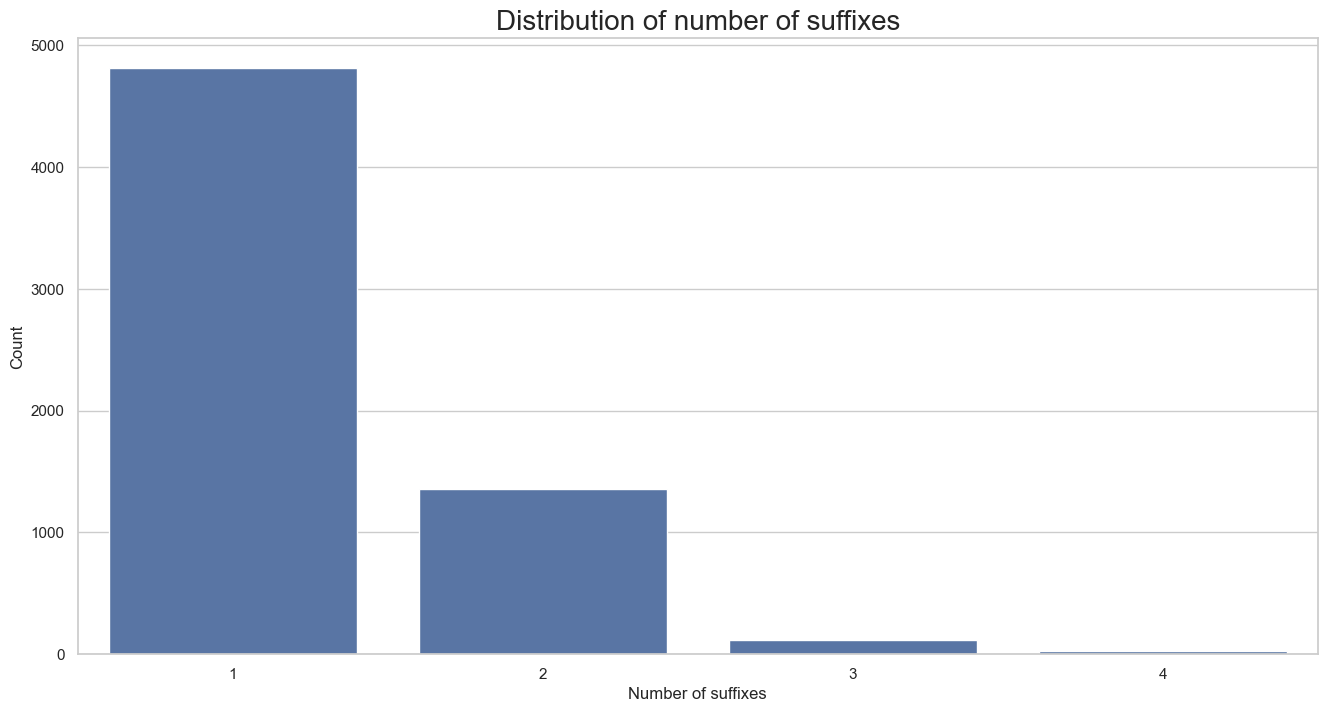

In [38]:
number_of_suffixes = []

for sample in en_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [39]:
number_of_suffixes_counter

Counter({1: 4818, 2: 1358, 3: 117, 4: 26})

In [40]:
balanced_data = read_json("../data/en/MorphoLEX_en_prep_balanced.json")

Counter({1: 25, 2: 25, 3: 25, 4: 24})


<Axes: title={'center': 'Distribution of number of suffixes'}, xlabel='Number of suffixes', ylabel='Count'>

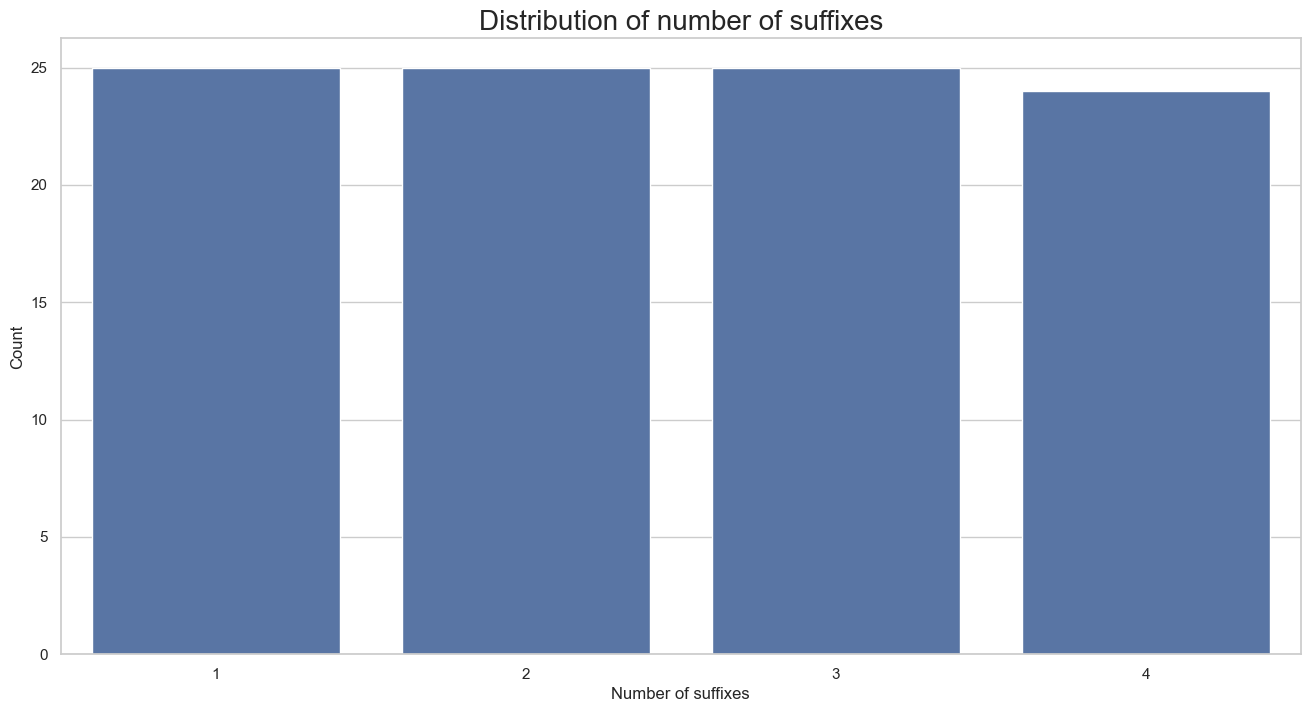

In [41]:
number_of_suffixes = []

for sample in balanced_data["data"]:
    number_of_suffixes.append(len(sample["morphemes"]))

number_of_suffixes_counter = Counter(number_of_suffixes)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of number of suffixes")
ax.set_xlabel("Number of suffixes")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
print(number_of_suffixes_counter)
sns.barplot(dict(number_of_suffixes_counter), ax=ax)

In [1]:
from utils import read_json, write_json

btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd.json")

In [5]:
from collections import Counter
from tqdm import tqdm

unigram_frequency = Counter()

for sample in tqdm(btwd_data, total=len(btwd_data), desc="Counting unigrams"):
    for sentence in sample["sentences"]:
        words = [w.lower().strip() for w in sentence.split()]
        unigram_frequency.update(words)

Counting unigrams: 100%|██████████| 6831/6831 [00:03<00:00, 2028.65it/s]


In [7]:
len(unigram_frequency)

348173

In [3]:
from tqdm import tqdm
num_words = 0

for sample in tqdm(btwd_data, total=len(btwd_data), desc="Counting words"):
    for sentence in sample["sentences"]:
        num_words += len(sentence.split())

num_words

Counting words: 100%|██████████| 6831/6831 [00:00<00:00, 11501.18it/s]


3775470

<Axes: title={'center': 'Distribution of words (top 20)'}, xlabel='Word', ylabel='Count'>

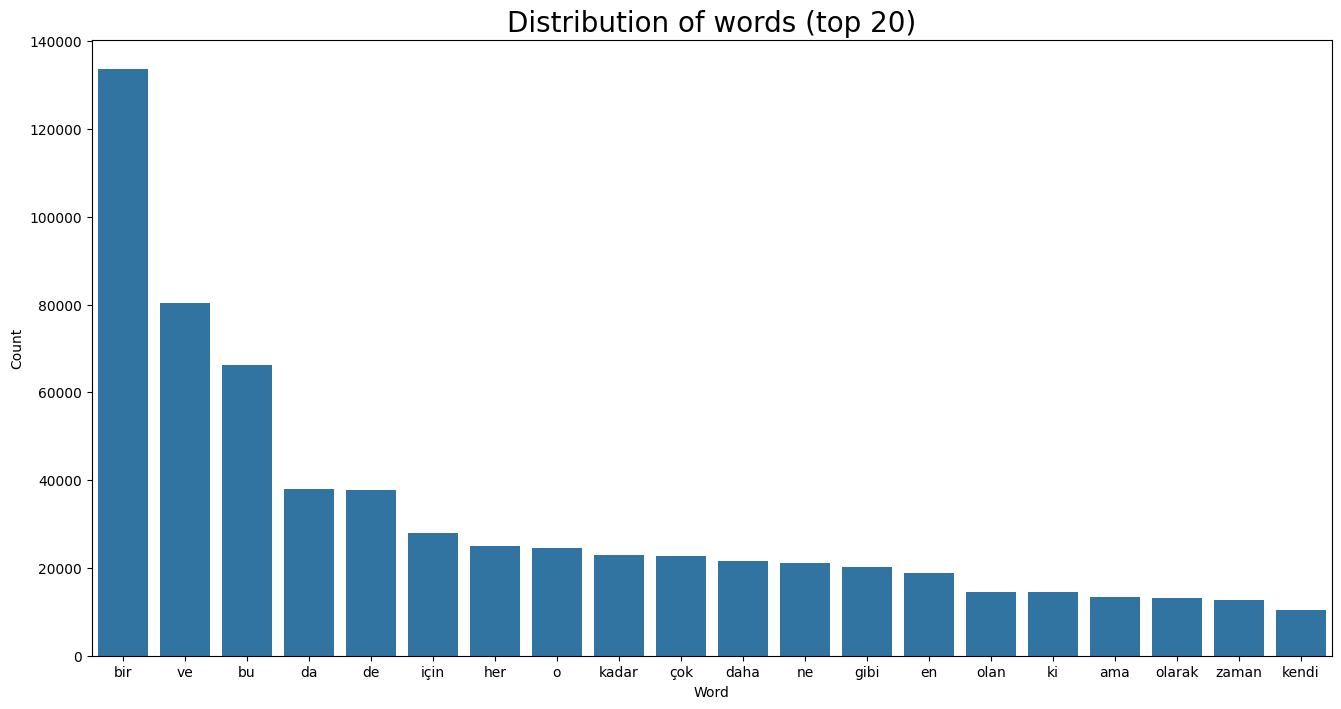

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of words (top 20)")
ax.set_xlabel("Word")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(unigram_frequency.most_common(20)), ax=ax)

In [8]:
write_json(unigram_frequency, "../data/tr/bilkent-turkish-writings/btwd_unigram_freq.json")

In [5]:
from collections import Counter
from tqdm import tqdm

unigram_frequency = read_json("../data/tr/bilkent-turkish-writings/btwd_unigram_freq.json")
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post.json")

morpheme_frequency = Counter()

for sample in tqdm(btwd_data["data"], total=len(btwd_data["data"]), desc="Counting morphemes"):
    morpheme_frequency.update({"".join(sample["morphemes"]): unigram_frequency.get(sample["derivations"], 0)})

Counting morphemes: 100%|██████████| 214524/214524 [00:01<00:00, 204567.87it/s]


<Axes: title={'center': 'Distribution of morphemes (top 20)'}, xlabel='Morpheme', ylabel='Count'>

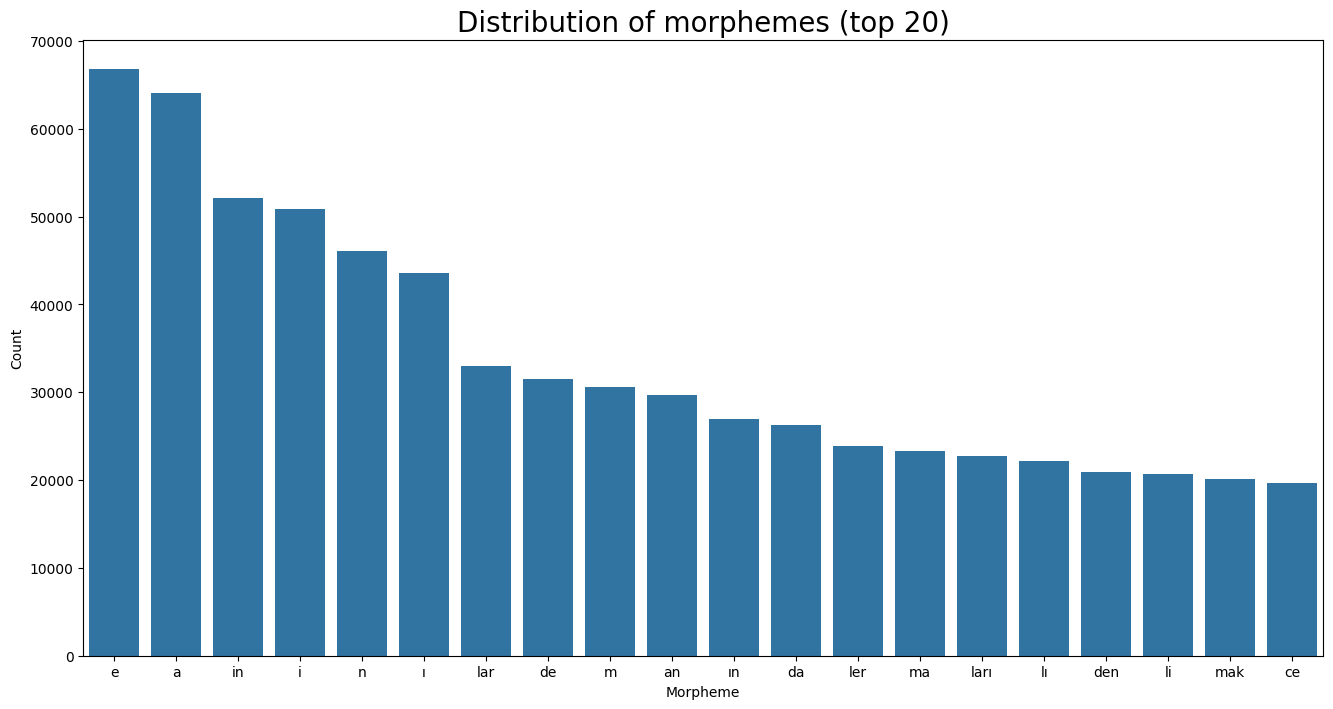

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of morphemes (top 20)")
ax.set_xlabel("Morpheme")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(morpheme_frequency.most_common(20)), ax=ax)

In [7]:
write_json(morpheme_frequency, "../data/tr/bilkent-turkish-writings/btwd_morpheme_freq.json")

In [8]:
from collections import Counter
from tqdm import tqdm

unigram_frequency = read_json("../data/tr/bilkent-turkish-writings/btwd_unigram_freq.json")
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post.json")

meta_morpheme_frequency = Counter()

for sample in tqdm(btwd_data["data"], total=len(btwd_data["data"]), desc="Counting meta morphemes"):
    meta_morpheme_frequency.update({"".join(sample["meta_morphemes"]): unigram_frequency.get(sample["derivations"], 0)})

Counting meta morphemes: 100%|██████████| 214524/214524 [00:00<00:00, 279572.74it/s]


<Axes: title={'center': 'Distribution of meta morphemes (top 20)'}, xlabel='Meta morpheme', ylabel='Count'>

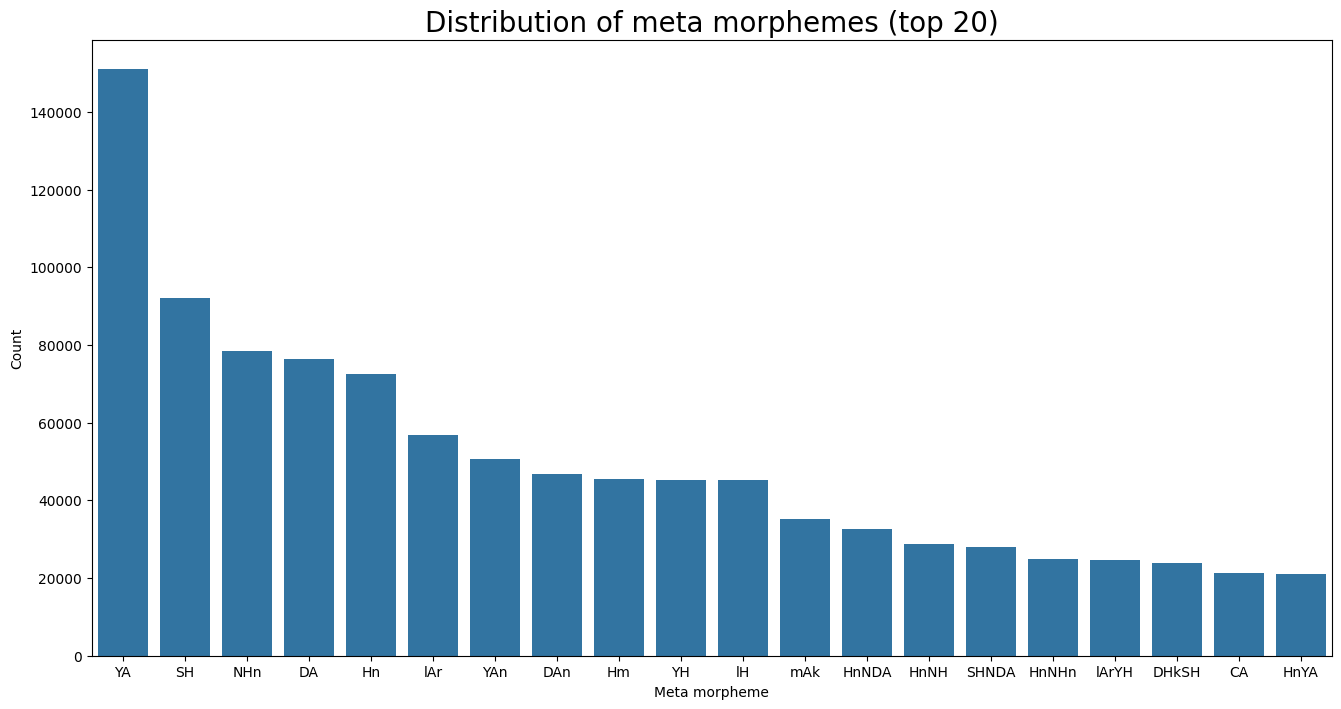

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of meta morphemes (top 20)")
ax.set_xlabel("Meta morpheme")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(dict(meta_morpheme_frequency.most_common(20)), ax=ax)

In [10]:
write_json(meta_morpheme_frequency, "../data/tr/bilkent-turkish-writings/btwd_meta_morpheme_freq.json")

In [11]:
morph_data = read_json("../experiments/data/tr/btwd/btwd_prep_post_balanced_morph_sample.json")

In [13]:
sample = morph_data["data"][0]
sample

{'id': 'tr-btwd-id-0',
 'original_root': None,
 'root': 'güzel',
 'pos': 'NOMP',
 'suffixes': ['di'],
 'derivation': 'güzeldi',
 'options': ['güzeldi'],
 'answer': 0}

In [14]:
morph_frequency = Counter()

for sample in morph_data["data"]:
    morph_frequency.update({sample["derivation"]: frequency_counter[sample["derivation"]]})

In [19]:
morph_frequency.values()

dict_values([86, 1, 482, 2434, 285, 36, 3, 95, 1599, 422, 96, 8, 829, 913, 703, 51, 57, 144, 16, 8137, 133, 6566, 23, 5247, 21, 6, 1918, 128, 89, 6194, 284, 59, 212, 3708, 38, 131, 15, 39, 226, 232, 1, 4, 14, 1407, 250, 1, 14, 65, 1, 3, 35, 476, 92, 56, 14, 295, 33, 2, 1989, 32, 119, 25, 2, 1936, 7, 2173, 130, 20, 376, 1, 34, 1, 18, 8, 6, 1848, 40, 14, 116, 507, 7, 21, 1, 41, 6, 5, 429, 2765, 2, 68, 10, 39, 3, 2, 830, 123, 6, 12, 5, 2, 368, 14, 6, 3, 29, 2, 1, 1, 162, 1, 2, 1, 2, 390, 7, 1, 1, 3, 5, 46, 3, 74, 3, 30, 39, 19, 1, 1, 6, 1, 15, 1, 1, 1, 1, 1, 1, 21, 1, 5, 1, 3, 5, 5, 7, 56, 50, 54, 5, 12, 3, 5, 5, 2, 1, 1, 13, 68, 22, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 14, 2, 3, 2, 1, 9, 1, 5, 1, 2, 5, 15, 1, 1, 1, 1, 1, 4, 1, 2, 9, 1, 2, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 7, 5, 1, 1, 16, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1

<Axes: title={'center': 'Distribution of word frequencies in BTWD balanced data'}, xlabel='Word frequency', ylabel='Count'>

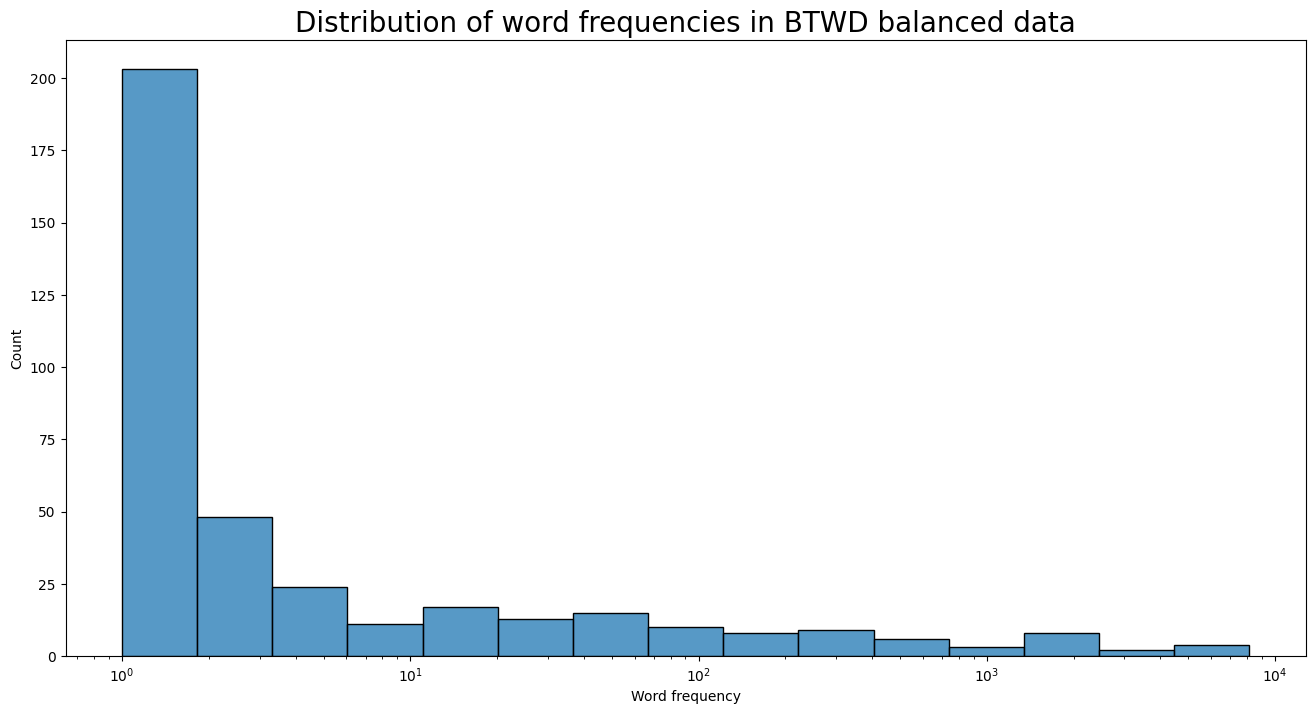

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of word frequencies in BTWD balanced data")
ax.set_xlabel("Word frequency")
ax.set_ylabel("Count")
ax.set_xscale('log')
# set the title font size
ax.title.set_size(20)
sns.histplot(list(morph_frequency.values()), ax=ax)

In [17]:
max_freq = morph_frequency.most_common(1)[0][1]
bins = [(0, 10), (10, 100), (100, 1000), (1000,)]

In [23]:
str((0, 10))

'(0, 10)'

In [18]:
bins

[(0, 813),
 (813, 1626),
 (1626, 2439),
 (2439, 3252),
 (3252, 4065),
 (4065, 4878),
 (4878, 5691),
 (5691, 6504),
 (6504, 7317),
 (7317, 8130),
 (8130, 8943)]

In [15]:
from utils import read_json, write_json, find_files
from tqdm import tqdm

balanced_data = read_json("../experiments/data/tr/btwd/balanced/btwd_prep_post_balanced_sample_morph.json")
balanced_nonce_data = read_json("../experiments/data/tr/btwd/balanced/btwd_prep_post_balanced_sample_morph_nonce.json")
balanced_data_map = {}

for sample in balanced_data["data"]:
    balanced_data_map[sample["id"]] = sample

for sample in balanced_nonce_data["data"]:
    balanced_data_map[sample["id"]] = sample

files = find_files("../experiments/outputs/gpt-4/tr/btwd/temp_tr/v_balanced")

for file in tqdm(files, total=len(files), desc="Processing files"):
    data = read_json(file)
    
    for sample in data["data"]:
        balanced_sample = balanced_data_map[sample["id"]]
        sample["meta_suffixes"] = balanced_sample["meta_suffixes"]
    
    write_json(data, file, ensure_ascii=False)

Processing files:   0%|          | 0/12 [00:00<?, ?it/s]

Processing files: 100%|██████████| 12/12 [00:00<00:00, 27.76it/s]


In [19]:
from utils import read_json, write_json

btwd = read_json("../data/tr/bilkent-turkish-writings/btwd.json")
btwd_balanced = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced_sample.json")

In [20]:
def _find_sentence(sample, derivation):
    for sample in btwd:
        for sentence in sample["sentences"]:
            count = sentence.lower().count(derivation)
            if count == 1:
                return sentence

for b_sample in tqdm(btwd_balanced["data"], total=len(btwd_balanced["data"]), desc="Finding sentences"):
    sentence = _find_sentence(btwd, b_sample["derivation"])
    if sentence:
        b_sample["sentence"] = sentence
    else:
        print("Not found:", b_sample["derivation"])

Finding sentences:  95%|█████████▌| 373/392 [00:20<00:03,  5.54it/s] 

Not found: anlatamadıklarımın


Finding sentences: 100%|██████████| 392/392 [00:23<00:00, 16.80it/s]


In [21]:
write_json(btwd_balanced, "../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced_sample.json", ensure_ascii=False)

In [1]:
from utils import read_json

morpheme_freqs = read_json("../data/tr/bilkent-turkish-writings/btwd_morpheme_freq.json")
meta_morpheme_freqs = read_json("../data/tr/bilkent-turkish-writings/btwd_meta_morpheme_freq.json")

<Axes: title={'center': 'Distribution of suffix frequencies in BTWD'}, xlabel='Suffix frequency', ylabel='Count'>

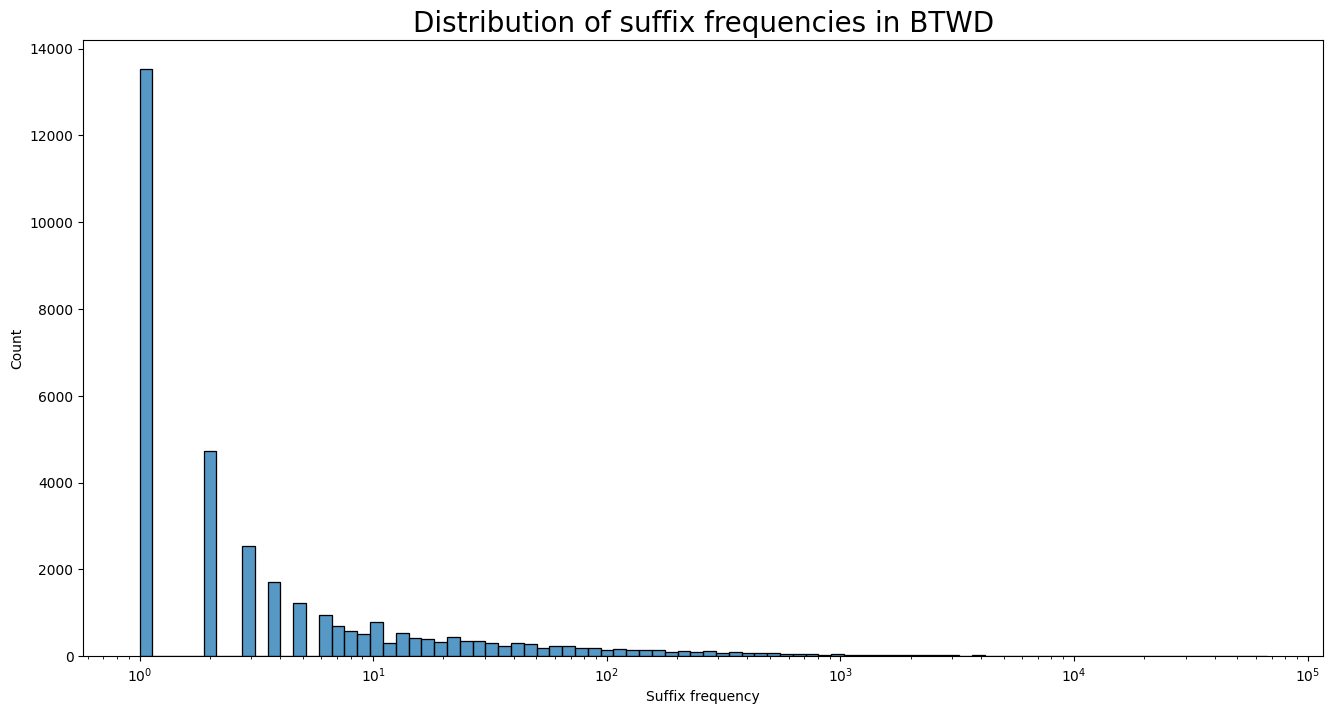

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffix frequencies in BTWD")
ax.set_xlabel("Suffix frequency")
ax.set_ylabel("Count")
ax.set_xscale('log')
# set the title font size
ax.title.set_size(20)
sns.histplot(list(morpheme_freqs.values()), ax=ax)

<Axes: title={'center': 'Distribution of suffix frequencies in BTWD'}, xlabel='Meta suffix frequency', ylabel='Count'>

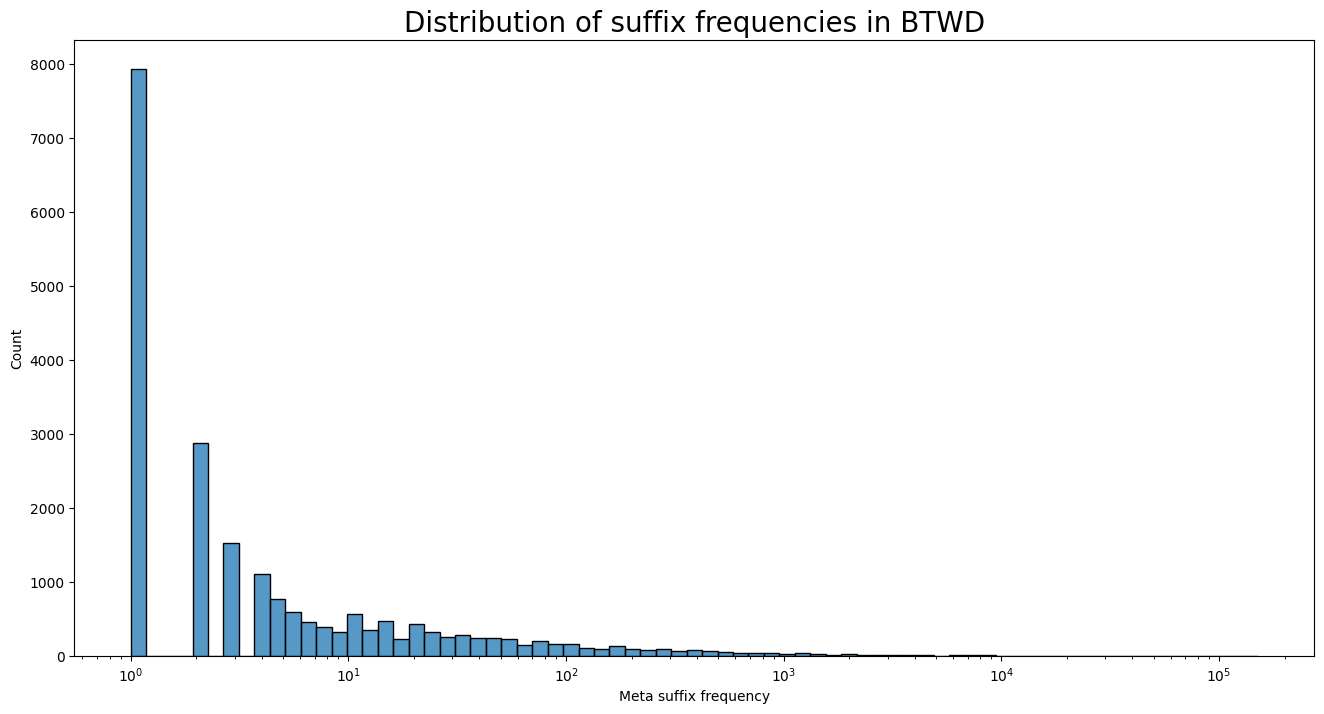

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("Distribution of suffix frequencies in BTWD")
ax.set_xlabel("Meta suffix frequency")
ax.set_ylabel("Count")
ax.set_xscale('log')
# set the title font size
ax.title.set_size(20)
sns.histplot(list(meta_morpheme_freqs.values()), ax=ax)

In [4]:
from utils import read_json, write_json

tok_aligned = read_json("../experiments/data/tr/btwd/tok_aligned/btwd_prep_post_balanced_morph_sample_tok_aligned.json")
sample_data = read_json("../experiments/data/tr/btwd/balanced/btwd_prep_post_balanced_sample_morph.json")

In [5]:
sample_map = {}

for sample in sample_data["data"]:
    sample_map[sample["id"]] = sample


for sample in tok_aligned["data"]:
    sample["sentence"] = sample_map[sample["id"]]["sentence"]

tok_aligned["metadata"]["source"] = "../experiments/data/tr/btwd/balanced/btwd_prep_post_balanced_sample_morph.json"
write_json(tok_aligned, "../experiments/data/tr/btwd/tok_aligned_sent/btwd_prep_post_balanced_morph_sample_tok_aligned_sent.json", ensure_ascii=False)

In [4]:
from utils import read_json
from collections import Counter

results = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/v_balanced/btwd_prep_post_balanced_morph_sample_eval_morph_gen_en_s5_gpt-4_1323177faa64.json")

errors = []

for result in results["data"]:
    if "error" in result:
        errors.append(result["error"])

print(len(errors))
print(Counter(errors))

100
Counter({'i/g/u': 40, 'i/u/u': 27, 'i/g/f': 21, 'i/u/f': 7, 'c/a': 3, 'e': 1, 'p': 1})


In [5]:
import pandas as pd

tok_aligned_results = pd.read_csv("../experiments/outputs/gpt-4/tr/btwd/temp_en/test/v_tok_aligned_no_quote/tab_results.csv")
default_results = pd.read_csv("../experiments/outputs/gpt-4/tr/btwd/temp_en/test/v3_balanced_no_quote/tab_results.csv")

In [6]:
tok_aligned_results["tok_aligned"] = "Yes"
default_results["tok_aligned"] = "No"

In [7]:
merged_results = pd.concat([tok_aligned_results, default_results])

Saving figure to ../experiments/figures/test/v_tok_aligned_no_quote/fig_acc_morph-gen_s5_vs_default.png


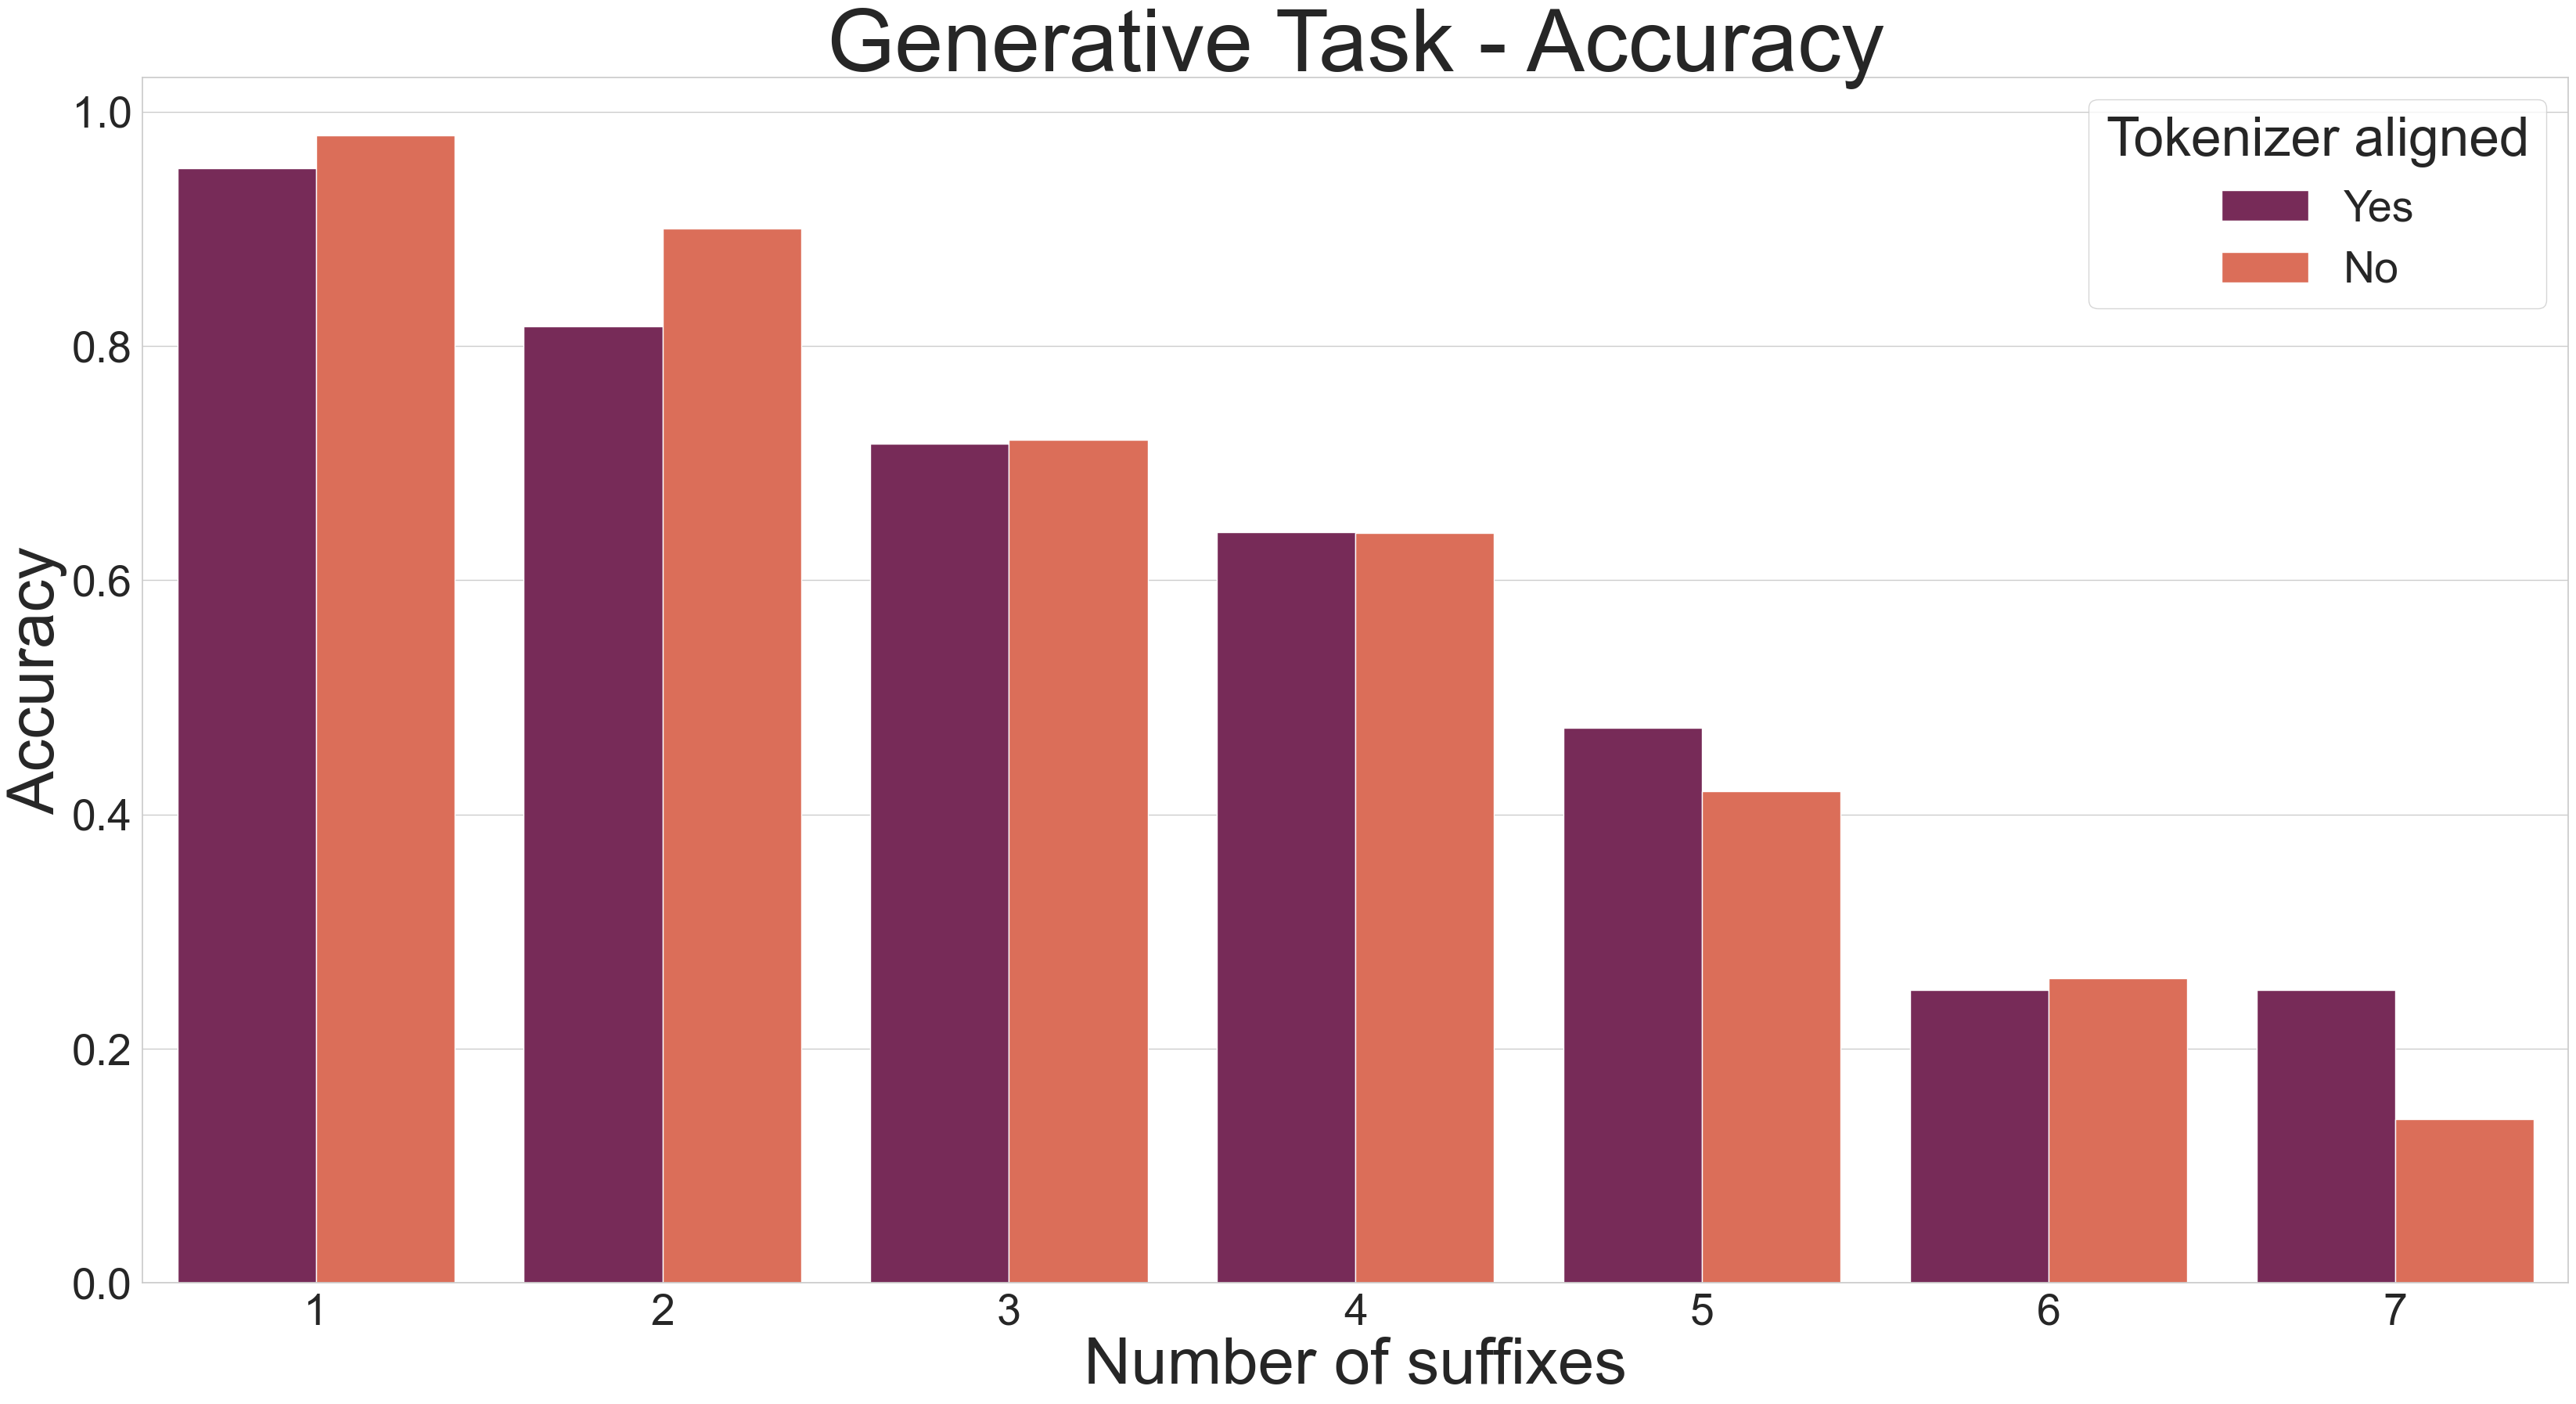

In [17]:
import seaborn as sns
from plot_results import ABBR_METRICS
import matplotlib.pyplot as plt

task = "morph-gen"
max_suffix_length = 7
num_shots = 5
metric = "accuracy"
language = "tr"
model = "gpt-4"
template = "en"
output_format = "png"
output_dir = "../experiments/figures/test/v_tok_aligned_no_quote"

TASK_TITLE_MAP = {
    "morph-disc": "Discriminative Task",
    "morph-gen": "Generative Task"
}

results = merged_results.query(f"task == '{task}' & is_ood == False & num_suffixes <= {max_suffix_length} & num_shots == {num_shots}")
# overall_results = results.groupby(["num_shots", "tok_aligned"]).agg({"accuracy": "mean", "f1": "mean", "coherence": "mean", "faithfulness": "mean"}).reset_index()
fig, ax = plt.subplots(figsize=(40, 20))
ax.set_title(f"{TASK_TITLE_MAP[task]} - {metric.capitalize()}")
ax.set_xlabel("Number of suffixes", size=60)
ax.set_ylabel(metric.capitalize(), size=60)
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)
ax.title.set_size(80)
sns.barplot(data=results, x="num_suffixes", y=metric, hue="tok_aligned", ax=ax, errorbar=None, palette="rocket")
ax.legend(title="Tokenizer aligned", title_fontsize=50, fontsize=40)
plot_path = f"{output_dir}/fig_{ABBR_METRICS[metric]}_{task}_s{num_shots}_vs_default.{output_format}"
print(f"Saving figure to {plot_path}")
plt.savefig(plot_path)

Saving figure to ../experiments/figures/test/v3_balanced_no_quote/fig_f1_morph-disc_s5_en_vs_tr.svg


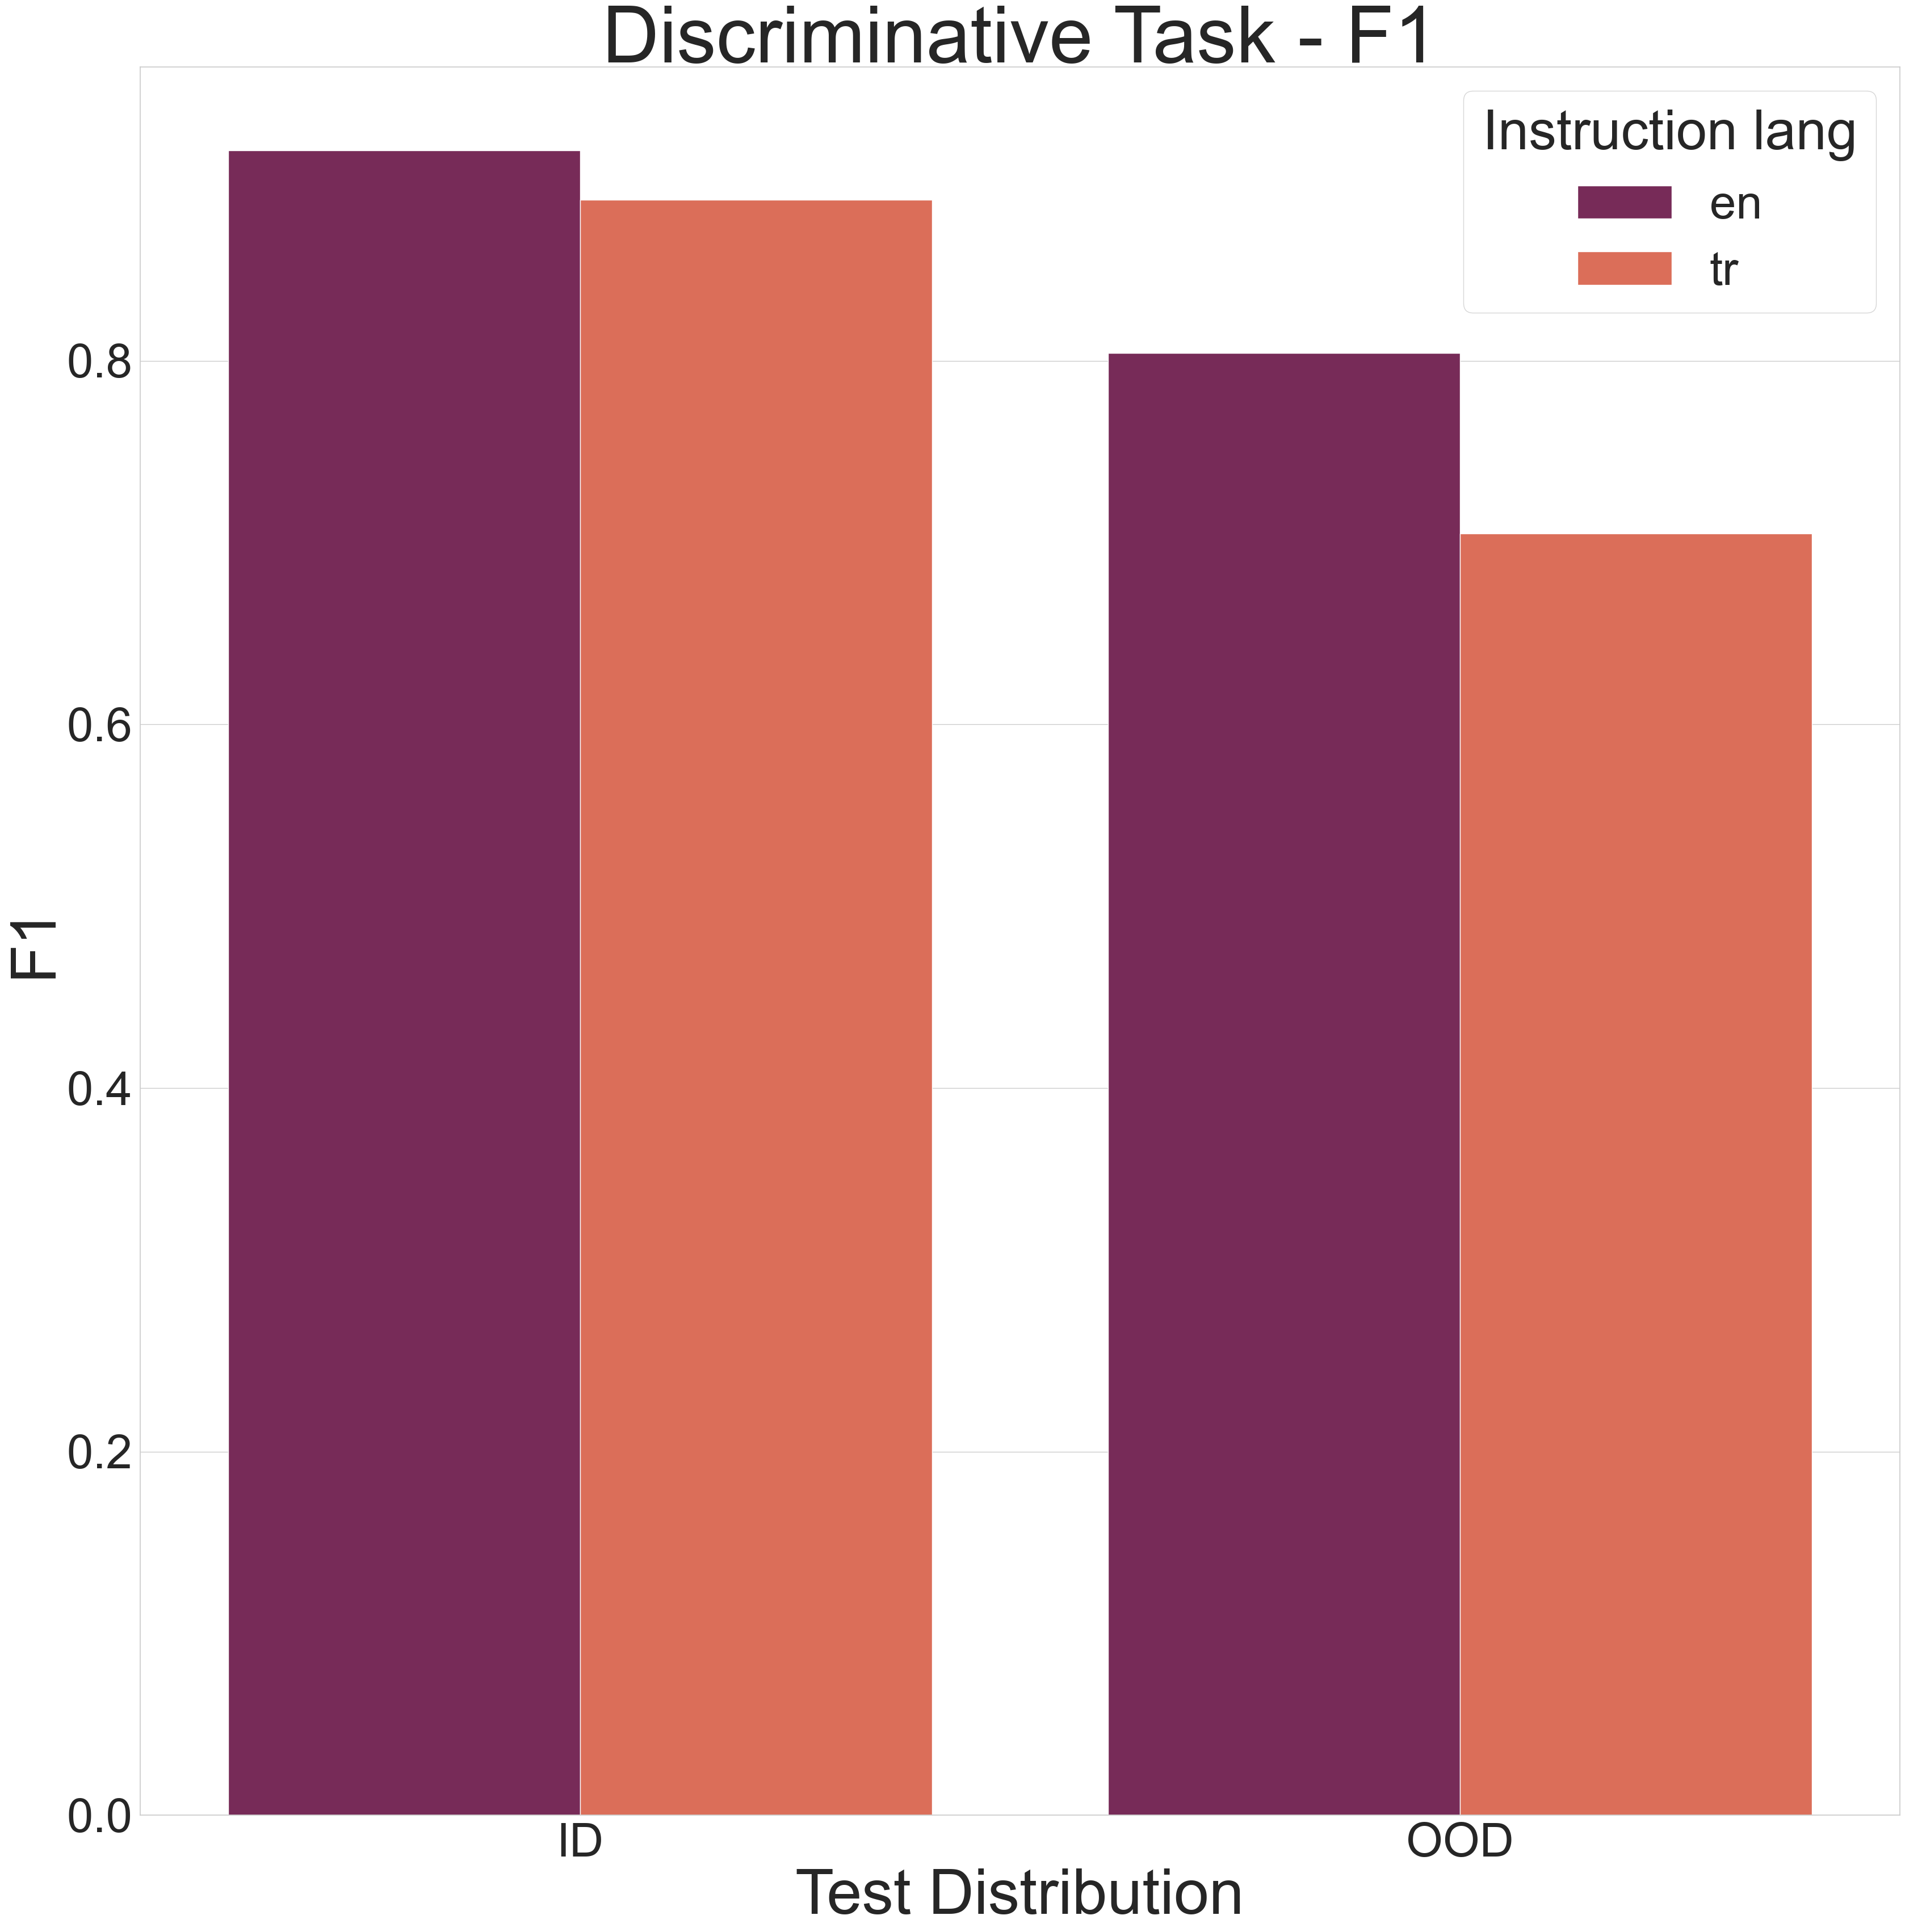

In [27]:
import seaborn as sns
from plot_results import ABBR_METRICS
import matplotlib.pyplot as plt

import pandas as pd

FIG_SIZE = (40, 40)
XLABEL_SIZE = 80
YLABEL_SIZE = 80
TITLE_SIZE = 100
TICK_SIZE = 60
LEGEND_TITLE_SIZE = 70
LEGEND_SIZE = 60

temp_en_results = pd.read_csv("../experiments/outputs/gpt-4/tr/btwd/temp_en/test/v3_balanced_no_quote/tab_results.csv")
temp_tr_results = pd.read_csv("../experiments/outputs/gpt-4/tr/btwd/temp_tr/test/v3_balanced_no_quote/tab_results.csv")

temp_en_results["template"] = "en"
temp_tr_results["template"] = "tr"

merged_results = pd.concat([temp_en_results, temp_tr_results])

task = "morph-disc"
max_suffix_length = 7
num_shots = 5
metric = "f1"
language = "tr"
model = "gpt-4"
template = "en"
output_format = "svg"
output_dir = "../experiments/figures/test/v3_balanced_no_quote"

TASK_TITLE_MAP = {
    "morph-disc": "Discriminative Task",
    "morph-gen": "Generative Task"
}

results = merged_results.query(f"task == '{task}' & num_suffixes <= {max_suffix_length} & num_shots == {num_shots}")
overall_results = results.groupby(["is_ood", "template"]).agg({"accuracy": "mean", "f1": "mean", "coherence": "mean", "faithfulness": "mean"}).reset_index().copy()
overall_results["dist"] = overall_results["is_ood"].replace({False: "ID", True: "OOD"})

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.set_title(f"{TASK_TITLE_MAP[task]} - {metric.capitalize()}")
ax.set_xlabel("Test Distribution", size=XLABEL_SIZE)
ax.set_ylabel(metric.capitalize(), size=YLABEL_SIZE)
ax.tick_params(axis='x', labelsize=TICK_SIZE)
ax.tick_params(axis='y', labelsize=TICK_SIZE)
ax.title.set_size(TITLE_SIZE)
sns.barplot(data=overall_results, x="dist", y=metric, hue="template", ax=ax, errorbar=None, palette="rocket")
ax.legend(title="Instruction lang", title_fontsize=LEGEND_TITLE_SIZE, fontsize=LEGEND_SIZE)
plot_path = f"{output_dir}/fig_{ABBR_METRICS[metric]}_{task}_s{num_shots}_en_vs_tr.{output_format}"
print(f"Saving figure to {plot_path}")
plt.savefig(plot_path)

In [14]:
from utils import read_json, write_json

final_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced_reviewed_final_extra_final.json")
# btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post.json")
# new_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced.json")

In [13]:
for sample in final_data["data"]:
    words = sample["sentence"].lower().split()
    if words.count(sample["derivation"]) > 1:
        print(sample)

{'root': 'iste', 'pos': 'V', 'derivation': 'ister', 'morphemes': ['r'], 'meta_morphemes': ['r'], 'sentence': 'Son olarak şunu söyleyebilirim, Emrah Serbes bir bağımlılıktır, bir kere yazılarının tadına varan kimse onu bırakamaz, ister roman, öykü, deneme ister dizi, film olsun hiç farketmez'}
{'root': 'kork', 'pos': 'V', 'derivation': 'korkut', 'morphemes': ['ut'], 'meta_morphemes': ['Ht'], 'sentence': 'Korkut 1 Cemre Korkut 21202427 Kentsel Tasarım ve Peyzaj Mimarlığı TURK 102-1 Başak Berna Cordan 13.07.2015 İNSANA VERİLEN SAFÇA DEĞERİN GÜCÜ John Steinbeck’in, Amerika tarihindeki en büyük ve sıkıntılı göçünü ele alan kitabı Gazap Üzümleri’nde birçok ailenin yaşadığı dramı, Joad ailesi üzerinden anlatmıştır'}
{'root': 'karşı', 'pos': 'N', 'derivation': 'karşılık', 'morphemes': ['lık'], 'meta_morphemes': ['lHk'], 'sentence': 'Görülen iyilikleri unutmayarak aynısıyla veya daha güzeliyle karşılık verip kişinin kendisinin karşılık beklememesidir vefakârlık'}
{'root': 'fark', 'pos': 'N', 'd

AttributeError: 'NoneType' object has no attribute 'lower'

In [15]:
from collections import defaultdict
import pandas as pd

def get_stats(data, data_type="final"):
    unique_roots = defaultdict(set)
    unique_suffixes = defaultdict(set)
    unique_meta_suffixes = defaultdict(set)
    unique_suffix_combs = defaultdict(set)
    unique_meta_suffix_combs = defaultdict(set)

    for sample in data["data"]:
        suffix_len = len(sample["morphemes"])
        meta_suffix_len = len(sample["meta_morphemes"])
        unique_roots[suffix_len].add(sample["root"])
        unique_suffixes[suffix_len].update(sample["morphemes"])
        unique_meta_suffixes[meta_suffix_len].update(sample["meta_morphemes"])
        unique_suffix_combs[suffix_len].add(tuple(sample["morphemes"]))
        unique_meta_suffix_combs[meta_suffix_len].add(tuple(sample["meta_morphemes"]))
    
    results = {
        "suffix_len": list(range(1, 8)),
        "num_samples": [len([sample for sample in data["data"] if len(sample["morphemes"]) == i]) for i in range(1, 8)],
        "num_unique_roots": [len(v) for k, v in sorted(list(unique_roots.items()), key=lambda x: x[0]) if 0 < k < 8],
        "num_unique_suffixes": [len(v) for k, v in sorted(list(unique_suffixes.items()), key=lambda x: x[0]) if 0 < k < 8],
        "num_unique_meta_suffixes": [len(v) for k, v in sorted(list(unique_meta_suffixes.items()), key=lambda x: x[0]) if 0< k < 8],
        "num_unique_suffix_combs": [len(v) for k, v in sorted(list(unique_suffix_combs.items()), key=lambda x: x[0]) if 0 < k < 8],
        "num_unique_meta_suffix_combs": [len(v) for k, v in sorted(list(unique_meta_suffix_combs.items()), key=lambda x: x[0]) if 0 < k < 8],
        "data_type": [data_type] * 7
    }
    print(results)
    return pd.DataFrame(results)

{'suffix_len': [1, 2, 3, 4, 5, 6, 7], 'num_samples': [259, 270, 268, 282, 272, 261, 155], 'num_unique_roots': [164, 232, 223, 250, 232, 191, 83], 'num_unique_suffixes': [170, 163, 171, 153, 141, 131, 120], 'num_unique_meta_suffixes': [84, 72, 67, 64, 59, 55, 53], 'num_unique_suffix_combs': [170, 242, 252, 271, 253, 242, 149], 'num_unique_meta_suffix_combs': [84, 232, 241, 266, 244, 234, 149], 'data_type': ['final', 'final', 'final', 'final', 'final', 'final', 'final']}


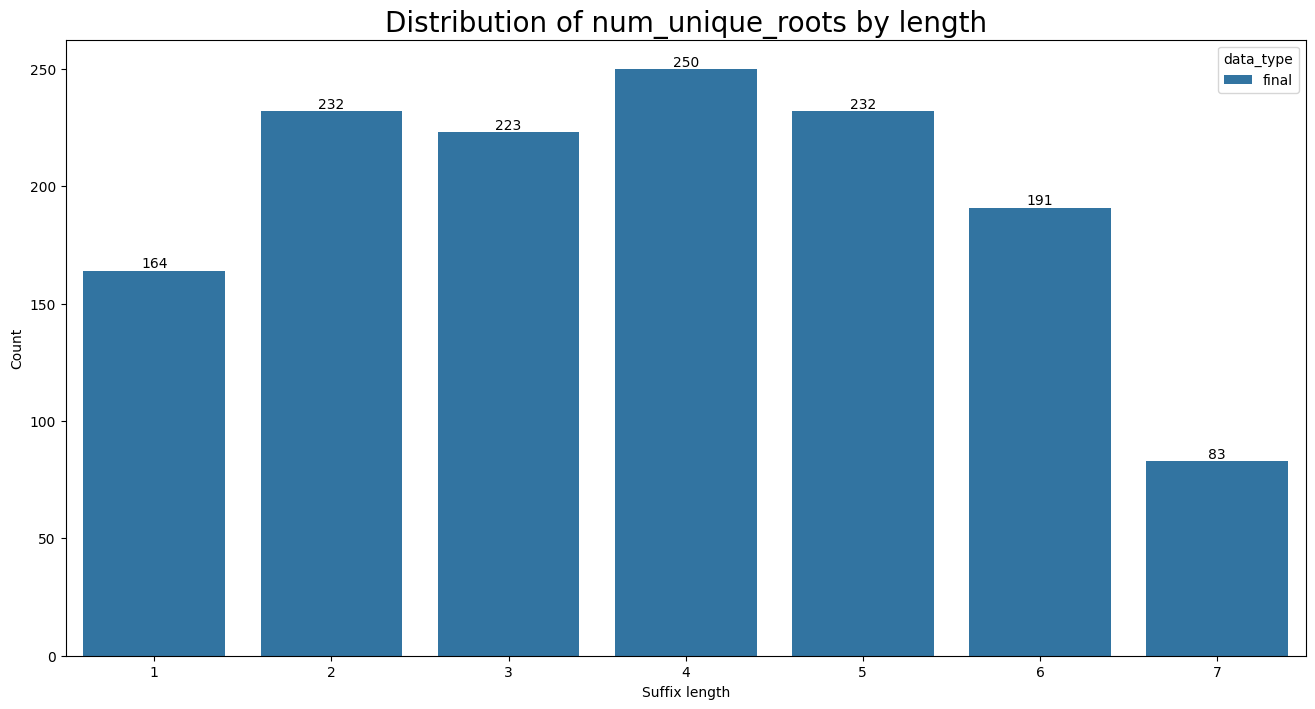

In [19]:
# full_stats = get_stats(btwd_data, data_type="full")
final_stats = get_stats(final_data, data_type="final")
# new_stats = get_stats(new_data, data_type="new")

# stats = pd.concat([full_stats, final_stats, new_stats])

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
feature = "num_unique_roots"
ax.set_title(f"Distribution of {feature} by length")
ax.set_xlabel("Suffix length")
ax.set_ylabel("Count")
# set the title font size
ax.title.set_size(20)
sns.barplot(data=final_stats, x="suffix_len", y=feature, hue="data_type", ax=ax)
for i in ax.containers:
    ax.bar_label(i,)

In [11]:
from utils import read_json, write_json

prev_final_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final1.json")
new_final_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced.json")

final_data = {"metadata": new_final_data["metadata"], "data": []}

prev_final_data_map = {d["derivation"]: d for d in prev_final_data["data"]}

for sample in new_final_data["data"]:
    prev_sample = prev_final_data_map.get(sample["derivation"])
    if prev_sample and prev_sample["pos"] in ["N", "V", "Adj", "Adv", "PP", "P", "NUM"]:
        final_data["data"].append(prev_sample)
    else:
        final_data["data"].append(sample)

write_json(final_data, "../data/tr/bilkent-turkish-writings/btwd_default_final.json")

In [3]:
from utils import read_json, write_json, concatenate

final_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced_reviewed_final.json")
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post.json")

num_samples = {i: len([sample for sample in final_data["data"] if len(sample["morphemes"]) == i]) for i in range(1, 8)}
goals = {i: max(0, 270-num_samples[i]) for i in range(1, 8)}
goals[8] = 0
goals[9] = 0

seen_derivations = [sample["derivation"] for sample in final_data["data"]]
seen_morpheme_combs = [tuple(sample["morphemes"]) for sample in final_data["data"]]
seen_meta_morpheme_combs = [tuple(sample["meta_morphemes"]) for sample in final_data["data"]]
extra_data = {i: [] for i in range(1, 10)}

for b_sample in btwd_data["data"]:
    if sum(goals.values()) == 0:
        break

    if b_sample["derivation"] not in seen_derivations and tuple(b_sample["morphemes"]) not in seen_morpheme_combs:
        num_morphemes = len(b_sample["morphemes"])
        if num_morphemes > 0 and (num_morphemes > 7 or goals[num_morphemes] > 0):
            extra_data[len(b_sample["morphemes"])].append(b_sample)
            seen_derivations.append(b_sample["derivation"])
            seen_morpheme_combs.append(tuple(b_sample["morphemes"]))
            # seen_meta_morpheme_combs.append(tuple(b_sample["meta_morphemes"]))
            if num_morphemes < 8:
                goals[num_morphemes] -= 1

write_json(concatenate([extra_data[i] for i in range(1, 10)]), "../data/tr/bilkent-turkish-writings/btwd_extra.json")

In [5]:
final_data = read_json("../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced_reviewed_final.json")
extra_data = read_json("../data/tr/bilkent-turkish-writings/btwd_extra_reviewed.json")

merged_data = {"metadata": final_data["metadata"], "data": final_data["data"] + extra_data}

write_json(merged_data, "../data/tr/bilkent-turkish-writings/btwd_prep_post_balanced_reviewed_final_extra.json")

In [14]:
from utils import read_json, write_json
import random

final_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json")
batch1_final_data = []
batch2_final_data = []

for i in range(1, 8):
    data = [sample for sample in final_data["data"] if len(sample["suffixes"]) == i]
    print(len(data))
    batch1_final_data.extend(random.sample(data, min(150, len(data))))

batch1_final_data_ids = [sample["id"] for sample in batch1_final_data]
batch2_final_data = [sample for sample in final_data["data"] if sample["id"] not in batch1_final_data_ids]

metadata1 = {
    "source": "../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json",
    "processor": "",
    "language": "tr",
    "size": len(batch1_final_data),
    "size_by_suffix_len": {
        i: len([sample for sample in batch1_final_data if len(sample["suffixes"]) == i]) for i in range(1, 8)
    }
}

metadata2 = {
    "source": "../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json",
    "processor": "",
    "language": "tr",
    "size": len(batch2_final_data),
    "size_by_suffix_len": {
        i: len([sample for sample in batch2_final_data if len(sample["suffixes"]) == i]) for i in range(1, 8)
    }
}
write_json({"metadata": metadata1, "data": batch1_final_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1.json")
write_json({"metadata": metadata2, "data": batch2_final_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch2.json")

256
256
263
273
254
239
149


In [13]:
from collections import Counter
from utils import concatenate

final_data_map = {}
new_data = {i: [] for i in range(1, 8)}

ids = [sample["id"] for sample in final_data["data"]]
duplicate_ids = [id_ for id_, count in Counter(ids).items() if count > 1]

for sample in final_data["data"]:
    if sample["id"] not in duplicate_ids:
        new_data[len(sample["suffixes"])].append(sample)

for id_ in duplicate_ids:
    samples = sorted([sample for sample in final_data["data"] if sample["id"] == id_], key=lambda x: len(x["suffixes"]))
    new_data[len(samples[-1]["suffixes"])].append(samples[-1])

new_data = concatenate([new_data[i] for i in range(1, 8)])

metadata = {
    "sources": final_data["metadata"]["sources"],
    "processor": "morph",
    "language": "tr",
    "size": len(new_data),
    "size_by_suffix_len": {
        i: len([sample for sample in new_data if len(sample["suffixes"]) == i]) for i in range(1, 8)
    }
}
write_json({"metadata": metadata, "data": new_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph2.json")

ids = [sample["id"] for sample in new_data]
Counter(ids).most_common(10)

[('tr-btwd-a29520b5', 1),
 ('tr-btwd-fe986d7e', 1),
 ('tr-btwd-358f636a', 1),
 ('tr-btwd-7ac7ba1f', 1),
 ('tr-btwd-21a63872', 1),
 ('tr-btwd-8155f4ef', 1),
 ('tr-btwd-7d5bb1eb', 1),
 ('tr-btwd-1c1a7d32', 1),
 ('tr-btwd-c2aea462', 1),
 ('tr-btwd-eb533747', 1)]

In [2]:
from utils import read_json, write_json
import random
import hashlib

final_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_sample.json")

for sample in final_data["data"]:
    sample["id"] = "tr-btwd-" + hashlib.md5(sample["derivation"].encode()).hexdigest()[:8]

write_json(final_data, "../data/tr/bilkent-turkish-writings/btwd_default_final_sample.json")

In [1]:
from utils import read_json, write_json
from collections import defaultdict

data = read_json("../data/en/morpholex_prep_balanced_reviewed.json")
counter = defaultdict(int)

for sample in data["data"]:
    num_morphemes = len(sample["roots"]) + len(sample["suffixes"]) + len(sample["prefixes"])
    counter[num_morphemes] += 1

In [2]:
counter

defaultdict(int, {2: 78, 3: 144, 4: 111, 5: 67, 6: 8, 7: 1})

In [24]:
from utils import read_json
from collections import defaultdict

data = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/test/v3_balanced_no_quote/btwd_prep_post_balanced_sample_morph_nonce_eval_morph_disc_bin_en_s5_gpt-4_59fe88073441.json")
data_by_id = defaultdict(list)

for sample in data["data"]:
    data_by_id[sample["id"]].append(sample["correct"])

all_falses = len([id_ for id_, results in data_by_id.items() if len(results) > 3 and not all(results)])
last_falses = len([id_ for id_, results in data_by_id.items() if len(results) > 3 and results[-4]])

all_falses, last_falses

(171, 249)

In [8]:
from utils import read_json

test_results = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/test/v3_balanced_no_quote/btwd_prep_post_balanced_sample_morph_eval_morph_disc_bin_en_s5_gpt-4_5c4fd73b8658.json")
final_results = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default/btwd_default_final_morph_batch1_eval_morph_disc_en_s5_gpt-4_ea5e3972765d.json")

accuracy = 0
overlap = set([sample["root"]+"".join(sample["suffixes"]) for sample in test_results["data"] if len(sample["suffixes"]) == 1]).intersection(set([sample["derivation"] for sample in final_results["data"] if len(sample["suffixes"]) == 1]))

mismatch = 0
for result in test_results["data"]:
    derivation = result["root"]+"".join(result["suffixes"])
    if derivation in overlap:
        final_result = [sample for sample in final_results["data"] if sample["derivation"] == derivation][0]
        mismatch += final_result["correct"] != result["correct"]

mismatch, len(overlap)

(3, 19)

In [11]:
from utils import write_json

data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json")
suffix1_data = [sample for sample in data["data"] if len(sample["suffixes"]) == 1]

metadata = {
    "source": "../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json",
    "processor": "",
    "language": "tr",
    "size": len(suffix1_data)
}

write_json({"metadata": metadata, "data": suffix1_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_suffix1.json")

In [13]:
import pandas as pd

results = pd.read_csv("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default/tab_results.csv")

overall = results.groupby(["task", "is_ood", "num_shots"]).agg({"accuracy": "mean", "f1": "mean", "coherence": "mean", "faithfulness": "mean"}).reset_index()
print(overall)

          task  is_ood  num_shots  accuracy        f1  coherence  faithfulness
0   morph-disc   False          1  0.898138  0.845851   0.713052      0.000000
1   morph-disc   False          3  0.901274  0.878170   0.750221      0.000000
2   morph-disc   False          5  0.911182  0.896049   0.748226      0.000000
3   morph-disc    True          1  0.715734  0.573305   0.332841      0.000000
4   morph-disc    True          3  0.770151  0.714219   0.521477      0.000000
5   morph-disc    True          5  0.749677  0.719670   0.474695      0.000000
6    morph-gen   False          1  0.485132  0.000000   0.000000      0.522647
7    morph-gen   False          3  0.517984  0.000000   0.000000      0.559315
8    morph-gen   False          5  0.539322  0.000000   0.000000      0.578182
9    morph-gen    True          1  0.362476  0.000000   0.000000      0.456811
10   morph-gen    True          3  0.401385  0.000000   0.000000      0.503749
11   morph-gen    True          5  0.433949  0.00000

In [14]:
overall["is_ood"].replace({False: "ID", True: "OOD"})

0      ID
1      ID
2      ID
3     OOD
4     OOD
5     OOD
6      ID
7      ID
8      ID
9     OOD
10    OOD
11    OOD
Name: is_ood, dtype: object

In [1]:
from utils import read_json

test_results = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/test/v3_balanced_no_quote/btwd_prep_post_balanced_sample_morph_eval_morph_disc_bin_en_s5_gpt-4_5c4fd73b8658.json")
final_results = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_suffix1/btwd_default_final_morph_suffix1_eval_morph_disc_en_s5_gpt-4_5b358cd1071a.json")

accuracy = 0
overlap = set([sample["root"]+"".join(sample["suffixes"]) for sample in test_results["data"] if len(sample["suffixes"]) == 1]).intersection(set([sample["derivation"] for sample in final_results["data"] if len(sample["suffixes"]) == 1]))

mismatch = 0
for result in test_results["data"]:
    derivation = result["root"]+"".join(result["suffixes"])
    if derivation in overlap:
        final_result = [sample for sample in final_results["data"] if sample["derivation"] == derivation][0]
        mismatch += final_result["correct"] != result["correct"]

mismatch, len(overlap)

(4, 30)

In [3]:
from utils import read_json, write_json, concatenate
import random

data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json")
suffix1_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph_suffix1.json")
suffixes = list(set(concatenate([list(zip(sample["suffixes"], sample["meta_suffixes"])) for sample in data["data"]])))

for sample in suffix1_data["data"]:
    negative_suffix = random.choice(suffixes)
    sample["negative_suffixes"] = [negative_suffix[0]]
    sample["negative_meta_suffixes"] = [negative_suffix[1]]
    sample["negative_options"] = [sample["root"]+"".join(sample["negative_suffixes"])]

write_json(suffix1_data, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_suffix1.json")

In [ ]:
from utils import read_json

id_data = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_cot/sample/btwd_default_final_morph_sample_eval_morph_disc_cot_en_s1_gpt-4_8c71d4436ced.json")
ood_data = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_cot/sample/btwd_default_final_morph_sample_nonce_eval_morph_disc_cot_en_s1_gpt-4_109db80f2380.json")

id_map = {sample["id"]: sample for sample in id_data["data"]}
ood_map = {sample["id"]: sample for sample in ood_data["data"]}

for id_sample in id_data["data"]:
    ood_sample = ood_map[id_sample["id"]]

In [1]:
from utils import read_json, write_json
from collections import defaultdict

en_data = read_json("../data/en/morpholex_prep_balanced_reviewed.json")
affix_counter = defaultdict(int)

for sample in en_data["data"]:
    affix_counter[len(sample["suffixes"])+len(sample["prefixes"])] += 1

affix_counter

defaultdict(int, {1: 90, 2: 114, 3: 96, 4: 41, 5: 8, 0: 59, 6: 1})

In [5]:
from utils import concatenate

final_data = {i: [] for i in range(1, 5)}
extra_data = {i: [] for i in range(1, 5)}
seen_affixes = set()

for sample in en_data["data"]:
    affixes = sample["prefixes"] + sample["suffixes"]
    num_affixes = len(affixes)

    if 1 <= num_affixes < 5 and len(sample["roots"]) == 1:
        if tuple(affixes) not in seen_affixes:
            final_data[num_affixes].append(sample)
            seen_affixes.add(tuple(affixes))
        else:
            extra_data[num_affixes].append(sample)

for i in range(1, 5):
    if len(final_data[i]) < 50:
        final_data[i].extend(extra_data[i][:50-len(final_data[i])])
    else:
        final_data[i] = final_data[i][:50]

final_data = concatenate([final_data[i] for i in range(1, 5)])
metadata = {
    "source": "../data/en/morpholex_prep_balanced_reviewed.json",
    "processor": "",
    "language": "en",
    "size": len(final_data),
    "size_by_affix_len": {i: len([sample for sample in final_data if len(sample["suffixes"])+len(sample["prefixes"]) == i]) for i in range(1, 5)}
}
write_json({"metadata": metadata, "data": final_data}, "../data/en/morpholex_prep_balanced_reviewed_final.json")

In [7]:
from utils import read_json
from collections import defaultdict

data = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default/batch1/btwd_default_final_morph_batch1_nonce_eval_morph_disc_en_s5_gpt-4_00d05b8c7970.json")

summary = {
    0: [],
    1: {"yes": [], "no": []},
    2: []
}

by_id = defaultdict(list)

for sample in data["data"]:
    if len(sample["suffixes"]) == 2:
        by_id[sample["id"]].append(sample)

for _id, samples in by_id.items():
    incorrect = 0
    reference = None
    for sample in samples:
        if not sample["correct"]:
            reference = sample["reference"]
        incorrect += 1-int(sample["correct"])
    
    if incorrect == 1:
        summary[incorrect][reference.lower()].append(_id)
    else:
        summary[incorrect].append(_id)

for n, s in summary.items():
    if isinstance(s, list):
        print(len(s))
    else:
        print(len(s["yes"]), len(s["no"]))

112
31 6
1


In [6]:
summary[1]["yes"]

['tr-btwd-48c98742-ood',
 'tr-btwd-e9281a1f-ood',
 'tr-btwd-24cb6c2b-ood',
 'tr-btwd-2f67d10d-ood',
 'tr-btwd-cd261361-ood',
 'tr-btwd-692cceee-ood',
 'tr-btwd-cd043b33-ood',
 'tr-btwd-1c26d558-ood',
 'tr-btwd-5592df07-ood',
 'tr-btwd-85557d22-ood',
 'tr-btwd-db4c285d-ood',
 'tr-btwd-3f7708df-ood',
 'tr-btwd-12477262-ood',
 'tr-btwd-dc0918da-ood',
 'tr-btwd-4b76d96b-ood',
 'tr-btwd-d2eeb547-ood',
 'tr-btwd-cb3a40d2-ood',
 'tr-btwd-14528280-ood',
 'tr-btwd-563b528f-ood',
 'tr-btwd-360d3d2a-ood',
 'tr-btwd-f8b096f4-ood',
 'tr-btwd-a4abdbe3-ood',
 'tr-btwd-2cd4fd4a-ood',
 'tr-btwd-3327401f-ood',
 'tr-btwd-eba1107d-ood',
 'tr-btwd-d6306abe-ood',
 'tr-btwd-710f406e-ood',
 'tr-btwd-2f405f2f-ood',
 'tr-btwd-21a63872-ood',
 'tr-btwd-3a1c69f1-ood',
 'tr-btwd-92d3b310-ood',
 'tr-btwd-203649e0-ood',
 'tr-btwd-765c8b9b-ood',
 'tr-btwd-cee9e649-ood',
 'tr-btwd-eab08cd1-ood',
 'tr-btwd-5b3e63e9-ood',
 'tr-btwd-b10b129f-ood',
 'tr-btwd-6fda615d-ood',
 'tr-btwd-3c8ada25-ood',
 'tr-btwd-8930141f-ood',


In [5]:
from utils import read_json
import re

def double_vowel_mistake_analysis(result_path):
    results = read_json(result_path)
    vowels = ["a", "ı", "o", "u", "e", "i", "ö", "ü"]
    vowels_str = ''.join(vowels)
    vowel_re = re.compile(f"[{vowels_str}][{vowels_str}]")
    no_double_vowels = 0
    no_double_vowel_mistakes = 0
    double_vowels = 0
    double_vowel_mistakes = 0


    for sample in results["data"]:
        derivation = re.findall(r"Derived word: ([^\n]+)\n", sample["prompt"])[-1]
        suffix = derivation.replace(sample["root"], "", 1)
        correct = sample["correct"]
        if re.search(vowel_re, suffix):
            double_vowels += 1
            if not correct:
                double_vowel_mistakes += 1
        else:
            no_double_vowels += 1
            if not correct:
                no_double_vowel_mistakes += 1
    
    return no_double_vowels, no_double_vowel_mistakes, double_vowels, double_vowel_mistakes

In [6]:
# ID case
result_path = "../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default/batch1/btwd_default_final_morph_batch1_eval_morph_disc_en_s5_gpt-4_ea5e3972765d.json"
no_double_vowels, no_double_vowel_mistakes, double_vowels, double_vowel_mistakes = double_vowel_mistake_analysis(result_path)
print(no_double_vowels, no_double_vowel_mistakes, double_vowels, double_vowel_mistakes)

3451 285 888 12


In [7]:
# OOD case
result_path = "../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default/batch1/btwd_default_final_morph_batch1_nonce_eval_morph_disc_en_s5_gpt-4_00d05b8c7970.json"
no_double_vowels, no_double_vowel_mistakes, double_vowels, double_vowel_mistakes = double_vowel_mistake_analysis(result_path)
print(no_double_vowels, no_double_vowel_mistakes, double_vowels, double_vowel_mistakes)

3451 628 888 36


In [1]:
text = "You are given a novel word root with its definition, a list of suffixes (separated by comma) and a word in Turkish that is derived from the given word root using the given suffixes. Your task is to determine whether the derived word is grammatically correct. Answer only with Yes or No.\n\nExample 1:\nWord root: vısıt\nDefinition: vısıt means kayıt in Turkish.\nSuffixes: sız\nDerived word: vısıtsız\nAnswer: Yes\n\nExample 2:\nWord root: udu\nDefinition: udu means oku in Turkish.\nSuffixes: nde\nDerived word: udunde\nAnswer: No\n\nExample 3:\nWord root: mener\nDefinition: mener means ver in Turkish.\nSuffixes: mek\nDerived word: menermek\nAnswer: Yes\n\nExample 4:\nWord root: ceki\nDefinition: ceki means gibi in Turkish.\nSuffixes: acağız\nDerived word: cekiacağız\nAnswer: No\n\nExample 5:\nWord root: lataş\nDefinition: lataş means baş in Turkish.\nSuffixes: ta\nDerived word: lataşta\nAnswer: Yes\n\nExample 6:\nWord root: şakşet\nDefinition: şakşet means sohbet in Turkish.\nSuffixes: yin\nDerived word: şakşetyin\nAnswer:"
import re

words = re.findall(r"Derived word: ([^\n]+)\n", text)
print(words)


['vısıtsız', 'udunde', 'menermek', 'cekiacağız', 'lataşta', 'şakşetyin']


In [11]:
import re
vowels = ["a", "ı", "o", "u", "e", "i", "ö", "ü"]
vowels_str = ''.join(vowels)
vowel_re = re.compile(f"[{vowels_str}][{vowels_str}]")
suffix = "maamoz"

re.search(vowel_re, suffix)
# vowel_re

<re.Match object; span=(1, 3), match='aa'>

In [11]:
from utils import read_json, write_json
import random
from itertools import chain

SAMPLE_SIZE = 10

def sample_errors_for_review(result_path):
    results = read_json(result_path)

    errors = {i: [res for res in results["data"] if len(res["suffixes"]) == i and "correct" in res and not res["correct"]] for i in range(1, 8)}
    sample_errors = {i: [] for i in range(1, 8)}

    for i in range(1, 8):
        sample_errors[i].extend(random.sample(errors[i], min(SAMPLE_SIZE, len(errors[i]))))

    metadata = {
        **results["metadata"],
        "source": result_path,
        "sample_size": SAMPLE_SIZE,
        "size_by_suffix_len": {i: len(sample_errors[i]) for i in range(1, 8)}
    }

    return {"metadata": metadata, "data": list(chain(*sample_errors.values()))}

In [12]:
import pathlib

id_result_path = pathlib.Path("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_5s_cot/batch1/btwd_default_final_morph_batch1_eval_morph_gen_cot_en_s5_gpt-4_9805a34da62c.json")
sample_mistake_data = sample_errors_for_review(str(id_result_path))
write_json(sample_mistake_data, f"../experiments/review/tr/{id_result_path.stem}_error_sample.json")

In [13]:
import pathlib

ood_result_path = pathlib.Path("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_5s_cot/batch1/btwd_default_final_morph_batch1_nonce_eval_morph_gen_cot_en_s5_gpt-4_85e9a928d108.json")
sample_mistake_data = sample_errors_for_review(str(ood_result_path))
write_json(sample_mistake_data, f"../experiments/review/tr/{ood_result_path.stem}_error_sample.json")

In [15]:
from utils import read_json
from collections import defaultdict

data = read_json("../experiments/review/tr/btwd_default_final_morph_batch1_eval_morph_gen_en_s5_gpt-4_3fe2279b9c01_error_sample.json")

error_map = defaultdict(int)

for sample in data["data"]:
    invalid = sample["review"]["invalid"]
    unfaithful = sample["review"]["unfaithful"]
    hallucination = sample["review"]["hallucination"]
    error_map[(invalid, unfaithful, hallucination)] += 1

total = len(data["data"])
num_invalid = sum([count for (invalid, _, _), count in error_map.items() if invalid])
num_unfaithful = sum([count for (_, unfaithful, _), count in error_map.items() if unfaithful])
num_hallucination = sum([count for (_, _, hallucination), count in error_map.items() if hallucination])

error_map, total, num_invalid, num_unfaithful, num_hallucination

(defaultdict(int,
             {(True, True, True): 38,
              (False, True, True): 82,
              (False, True, False): 38,
              (True, False, False): 13,
              (False, False, False): 3,
              (True, True, False): 4}),
 178,
 55,
 162,
 120)

In [17]:
from utils import read_json
from collections import defaultdict

data = read_json("../experiments/review/tr/btwd_default_final_morph_batch1_nonce_eval_morph_gen_en_s5_gpt-4_7c4d4beca201_error_sample.json")

error_map = defaultdict(int)
foreign_alpha = 0

for sample in data["data"]:
    invalid = sample["review"]["invalid"]
    unfaithful = sample["review"]["unfaithful"]
    hallucination = sample["review"]["hallucination"]
    foreign_alpha += sample["review"].get("foreign_alphabet", 0)
    error_map[(invalid, unfaithful, hallucination)] += 1

total = len(data["data"])
num_invalid = sum([count for (invalid, _, _), count in error_map.items() if invalid])
num_unfaithful = sum([count for (_, unfaithful, _), count in error_map.items() if unfaithful])
num_hallucination = sum([count for (_, _, hallucination), count in error_map.items() if hallucination])

error_map, total, num_invalid, num_unfaithful, num_hallucination, foreign_alpha

(defaultdict(int,
             {(True, True, True): 83,
              (True, False, False): 44,
              (True, True, False): 19,
              (False, True, False): 22,
              (False, False, False): 3,
              (False, True, True): 14}),
 185,
 146,
 138,
 97,
 5)

### Inter-rater agreement

In [23]:
from utils import read_json
from sklearn.metrics import cohen_kappa_score

rater1 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator4/finnish_v4_default_final_morph_eval_morph_disc_human_en_s5_sample10_results.json")
rater2 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator2/finnish_v4_default_final_morph_eval_morph_disc_human_en_s5_sample10_results.json")

rater1_ids = [(sample["id"], sample["derivation"]) for sample in rater1["data"]]
rater2_ids = [(sample["id"], sample["derivation"]) for sample in rater2["data"]]
common_ids = set(rater1_ids).intersection(set(rater2_ids))
rater1_preds = [sample["prediction"][0] for sample in rater1["data"] if (sample["id"], sample["derivation"]) in common_ids]
rater2_preds = [sample["prediction"][0] for sample in rater2["data"] if (sample["id"], sample["derivation"]) in common_ids]

cohen_kappa_score(rater1_preds, rater2_preds)

0.7450770371591002

In [24]:
from utils import read_json
from sklearn.metrics import cohen_kappa_score

rater1 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator4/finnish_v4_default_final_morph_nonce_eval_morph_disc_human_en_s5_sample10_results.json")
rater2 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator2/finnish_v4_default_final_morph_nonce_eval_morph_disc_human_en_s5_sample10_results.json")

rater1_ids = [(sample["id"], sample["derivation"]) for sample in rater1["data"]]
rater2_ids = [(sample["id"], sample["derivation"]) for sample in rater2["data"]]
common_ids = set(rater1_ids).intersection(set(rater2_ids))
rater1_preds = [sample["prediction"][0] for sample in rater1["data"] if (sample["id"], sample["derivation"]) in common_ids]
rater2_preds = [sample["prediction"][0] for sample in rater2["data"] if (sample["id"], sample["derivation"]) in common_ids]

cohen_kappa_score(rater1_preds, rater2_preds)

0.8425584255842559

In [25]:
from utils import read_json
from sklearn.metrics import cohen_kappa_score

rater1 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator4/finnish_v4_default_final_morph_eval_morph_gen_human_en_s5_sample10_results.json")
rater2 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator2/finnish_v4_default_final_morph_eval_morph_gen_human_en_s5_sample10_results.json")

rater1_ids = [sample["id"] for sample in rater1["data"]]
rater2_ids = [sample["id"] for sample in rater2["data"]]
common_ids = set(rater1_ids).intersection(set(rater2_ids))
exact_match = 0

for id_ in common_ids:
    r1_sample = [sample for sample in rater1["data"] if sample["id"] == id_][0]
    r2_sample = [sample for sample in rater2["data"] if sample["id"] == id_][0]
    exact_match += r1_sample["prediction"][0] == r2_sample["prediction"][0]

exact_match / len(common_ids)

0.7666666666666667

In [26]:
from utils import read_json
from sklearn.metrics import cohen_kappa_score

rater1 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator4/finnish_v4_default_final_morph_nonce_eval_morph_gen_human_en_s5_sample10_results.json")
rater2 = read_json("../experiments/outputs/human/fi/temp_en/sample10_annotator2/finnish_v4_default_final_morph_nonce_eval_morph_gen_human_en_s5_sample10_results.json")

rater1_ids = [sample["id"] for sample in rater1["data"]]
rater2_ids = [sample["id"] for sample in rater2["data"]]
common_ids = set(rater1_ids).intersection(set(rater2_ids))
exact_match = 0

for id_ in common_ids:
    r1_sample = [sample for sample in rater1["data"] if sample["id"] == id_][0]
    r2_sample = [sample for sample in rater2["data"] if sample["id"] == id_][0]
    exact_match += r1_sample["prediction"][0] == r2_sample["prediction"][0]

exact_match / len(common_ids)

0.7833333333333333

In [10]:
from utils import read_json

results = read_json("../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default/batch1/btwd_default_final_morph_batch1_nonce_eval_morph_disc_en_s5_gpt-4_00d05b8c7970.json")
error_map = {1: {"yes": {"total": 0, "errors": 0}, "no": {"total": 0, "errors": 0}}, 2: {"yes": {"total": 0, "errors": 0}, "no": {"total": 0, "errors": 0}}}

for sample in results["data"]:
    num_suffixes = len(sample["suffixes"])

    if num_suffixes in [1, 2]:
        ref = sample["reference"].lower()
        error_map[num_suffixes][ref]["total"] += 1
        correct = sample["correct"]
        if not correct:
            error_map[num_suffixes][ref]["errors"] += 1

error_map

{1: {'yes': {'total': 150, 'errors': 97}, 'no': {'total': 150, 'errors': 13}},
 2: {'yes': {'total': 150, 'errors': 32}, 'no': {'total': 149, 'errors': 7}}}